<a href="https://colab.research.google.com/github/yeowonh/2021_summer/blob/main/Dacon_%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C%20%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 및 데이터

In [ ]:
# 드라이브 마운트
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import log_loss
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# 데이터 불러오기
train = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/credit/train.csv")
test = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/credit/test.csv")
sample_submission = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/credit/sample_submission.csv")

# 데이터 통계 분석

## 데이터 크기 & 결측치

In [ ]:
# 데이터 크기
train.shape

(26457, 20)

In [ ]:
# 상위 5개 데이터 출력
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2,-6,1
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3,-5,1
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2,-22,2
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2,-37,0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2,-26,2


In [ ]:
# 자료형 및 null 개수
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  int64  
 18  begin_

In [ ]:
# 결측치 확인
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [ ]:
test.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

'occyp type' feature에 대한 null 처리 필요

## 수치형 데이터

In [ ]:
# 수치형 데이터 통계 수치 확인
num_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]
train[num_cols].describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [ ]:
num_cols.remove('credit')
test[num_cols].describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,31456.50000,0.434700,1.850433e+05,-16020.466400,59776.690400,1.0,0.227600,0.296300,0.085600,2.202700,-26.272400
std,2886.89568,0.729102,1.015398e+05,4197.672887,138121.224504,0.0,0.419304,0.456648,0.279786,0.898272,16.348557
min,26457.00000,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,28956.75000,0.000000,1.215000e+05,-19483.250000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,31456.50000,0.000000,1.575000e+05,-15606.000000,-1577.000000,1.0,0.000000,0.000000,0.000000,2.000000,-25.000000
75%,33956.25000,1.000000,2.250000e+05,-12539.000000,-410.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,36456.00000,5.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,7.000000,0.000000


DAYS_EMPLOYED 양수값(=이상치)에 대한 처리 필요<br>
-> 0으로 채우기

In [ ]:
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].replace(365243, 0)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].replace(365243, 0)

## 범주형 데이터

In [ ]:
# 범주형 데이터 unique 값 확인
cat_cols = [col for col in train.columns if train[col].dtype in ['O']]
bin_cols = []
mul_cols = []
for col in cat_cols:
  print('name : {0}, unique_num : {1}\nunique_value : {2}\n'.format(col, len(train[col].unique()), train[col].unique()))

name : gender, unique_num : 2
unique_value : ['F' 'M']

name : car, unique_num : 2
unique_value : ['N' 'Y']

name : reality, unique_num : 2
unique_value : ['N' 'Y']

name : income_type, unique_num : 5
unique_value : ['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']

name : edu_type, unique_num : 5
unique_value : ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

name : family_type, unique_num : 5
unique_value : ['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']

name : house_type, unique_num : 6
unique_value : ['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']

name : occyp_type, unique_num : 19
unique_value : [nan 'Laborers' 'Managers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Drivers' 'Medicine staff' 'Accountants' 'Realty agents'
 'Security staff' 'Cleaning staff' 'Private service staff' 'Cooking staff'
 '

In [ ]:
for col in cat_cols:
  print('name : {0}, unique_num : {1}\nunique_value : {2}\n'.format(col, len(test[col].unique()), test[col].unique()))

name : gender, unique_num : 2
unique_value : ['M' 'F']

name : car, unique_num : 2
unique_value : ['Y' 'N']

name : reality, unique_num : 2
unique_value : ['N' 'Y']

name : income_type, unique_num : 5
unique_value : ['Pensioner' 'State servant' 'Working' 'Commercial associate' 'Student']

name : edu_type, unique_num : 5
unique_value : ['Secondary / secondary special' 'Higher education' 'Lower secondary'
 'Incomplete higher' 'Academic degree']

name : family_type, unique_num : 5
unique_value : ['Civil marriage' 'Married' 'Single / not married' 'Widow' 'Separated']

name : house_type, unique_num : 6
unique_value : ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

name : occyp_type, unique_num : 19
unique_value : [nan 'Core staff' 'Laborers' 'Drivers' 'Managers' 'Sales staff'
 'Cleaning staff' 'Accountants' 'Cooking staff' 'Medicine staff'
 'Realty agents' 'Waiters/barmen staff' 'Private service staff'
 'High skill tech st

train, test값 모두 unique 값 동일. <br>
이중분류 : gender, car, reality <br>
다중분류 : income_type, edu_type, family_type, house_type, occyp_type

# target 분리

In [ ]:
train_y = train['credit']
train_X = train.drop(['credit', 'index'], axis=1)
test_X = test.drop('index', axis=1)

# 이진분류 범주형 변환

In [ ]:
# 이진분류 범주형 데이터 -> 수치형으로 변환
train_X['gender'] = train_X['gender'].replace(['F','M'], [0,  1])
test_X['gender'] = test['gender'].replace(['F','M'], [0,  1])

for col in ['car', 'reality']:
  train_X[col] = train_X[col].replace(['N','Y'], [0,  1])
  test_X[col] = test_X[col].replace(['N','Y'], [0,  1])

# 시각화

## target 시각화

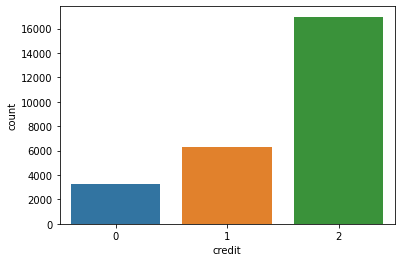

In [ ]:
sns.countplot(x='credit', data=train)

타깃의 불균형 확인. SMOTE나 다른 기법 사용

## 이산형 변수 시각화

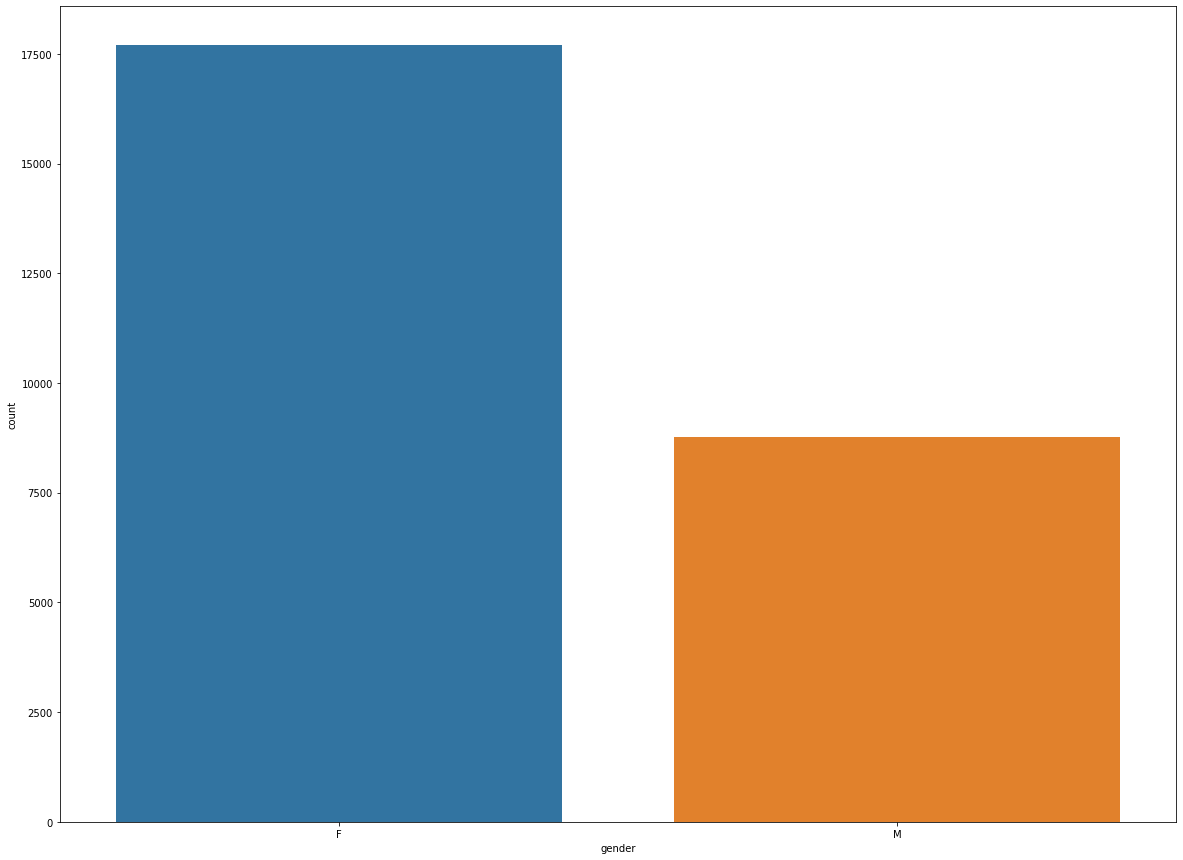

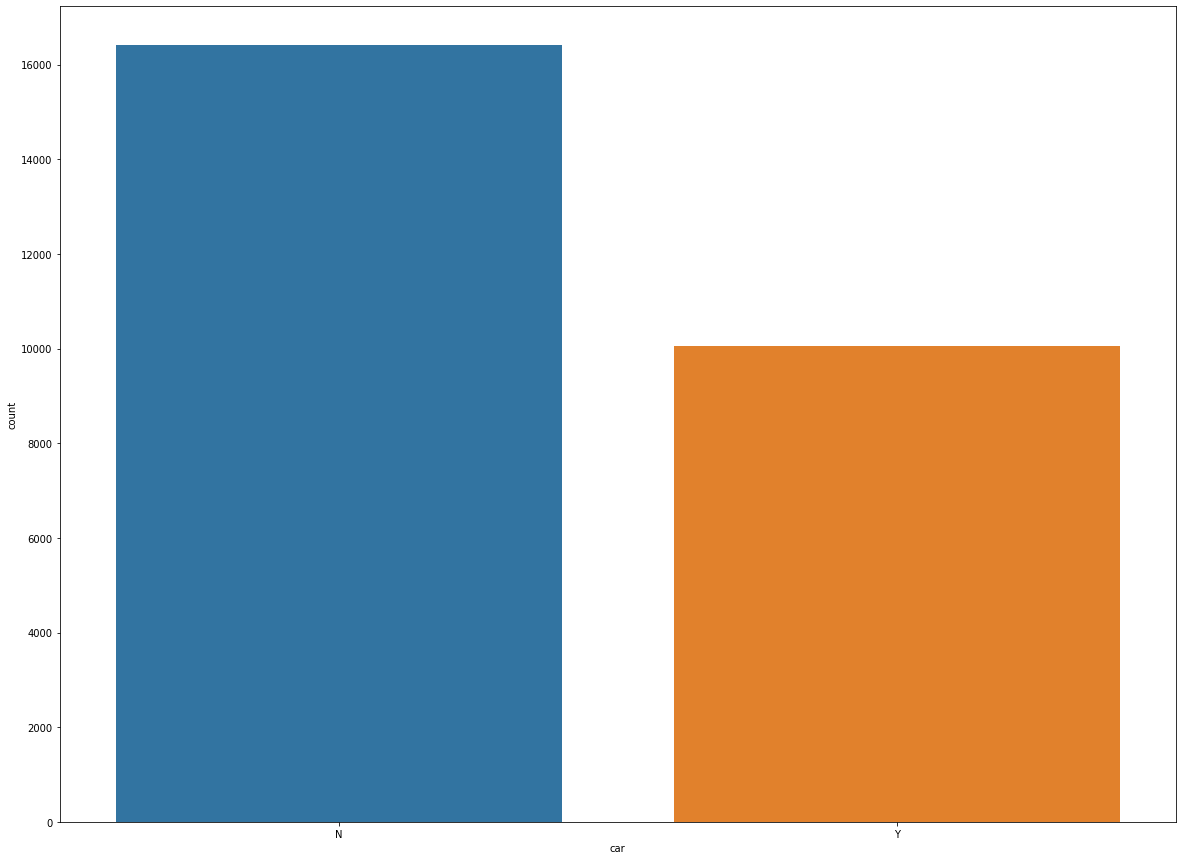

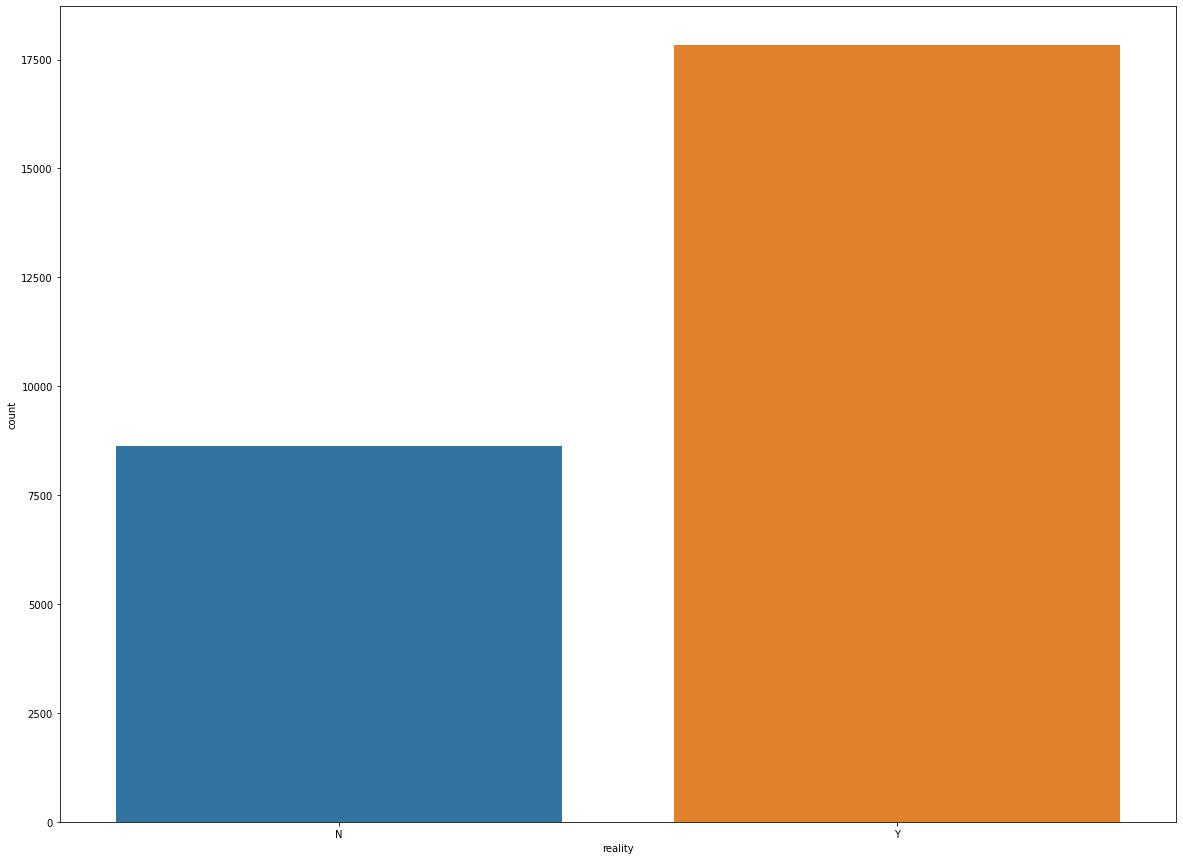

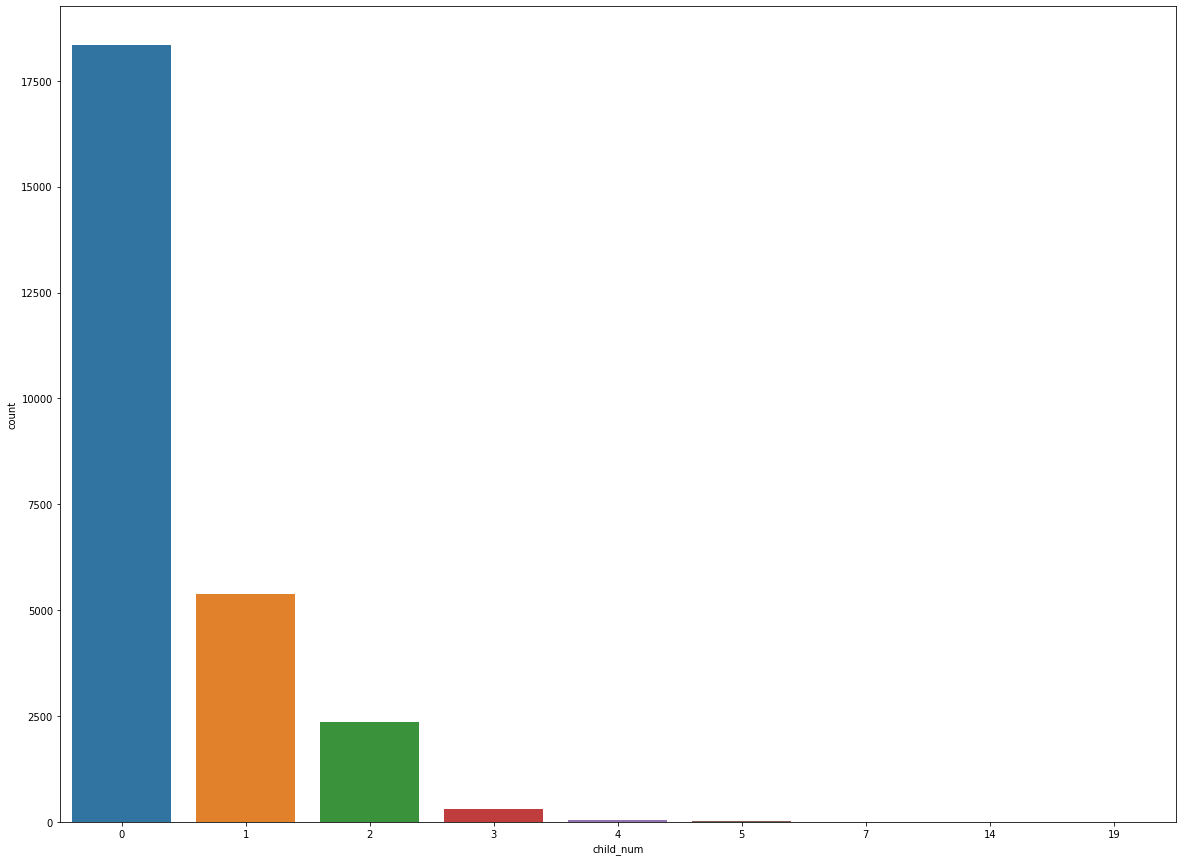

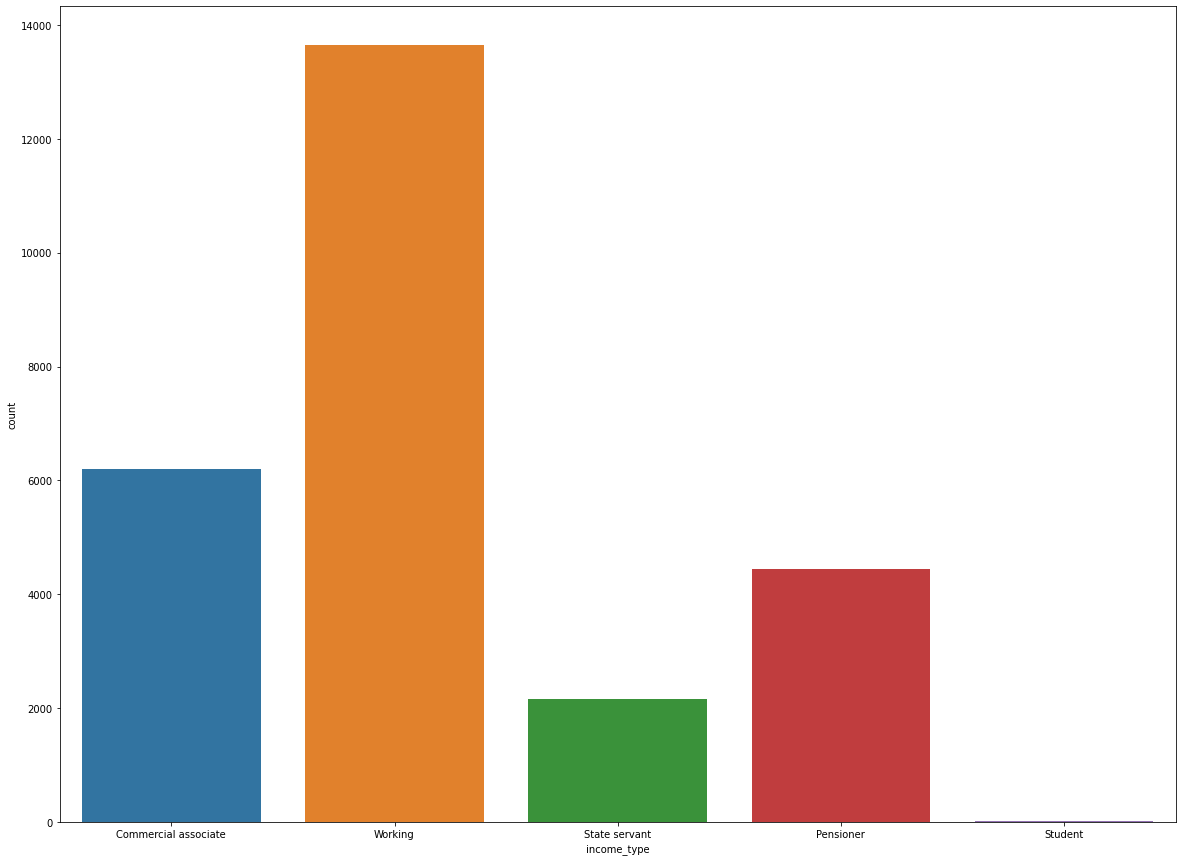

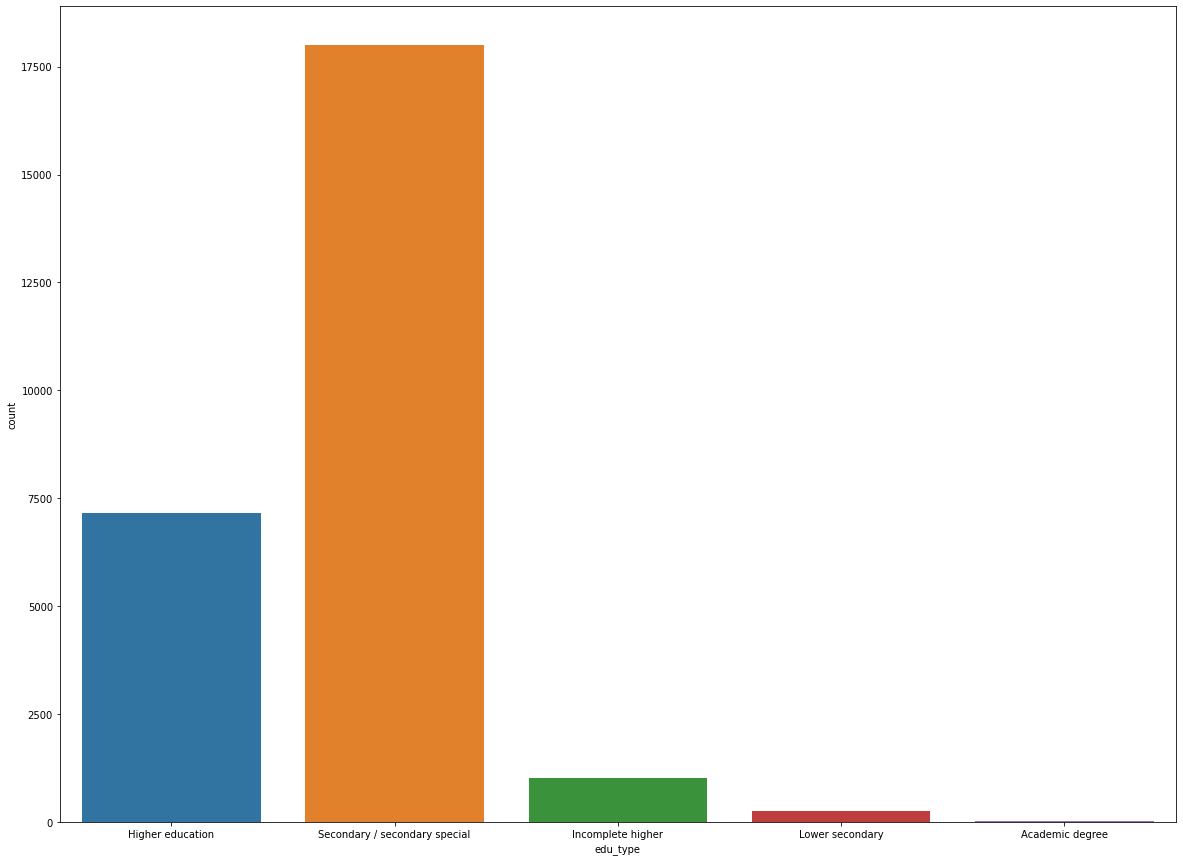

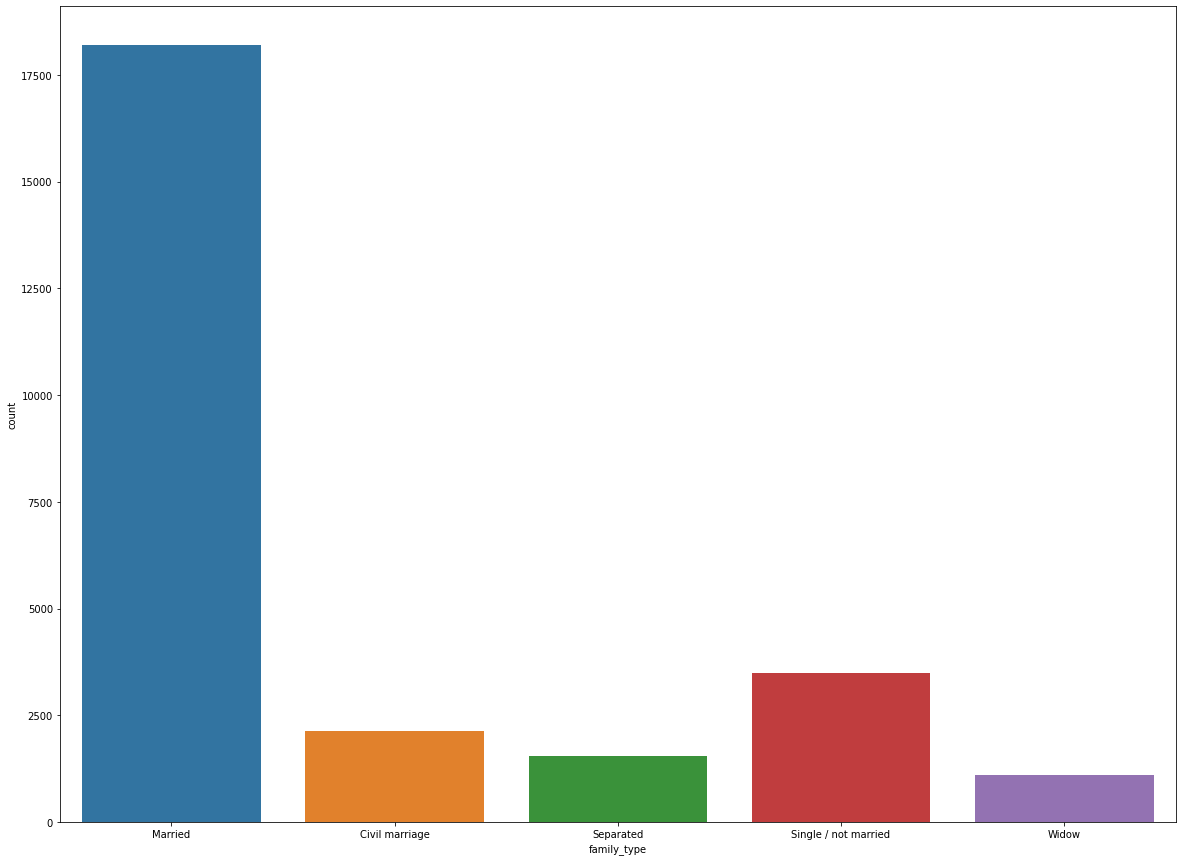

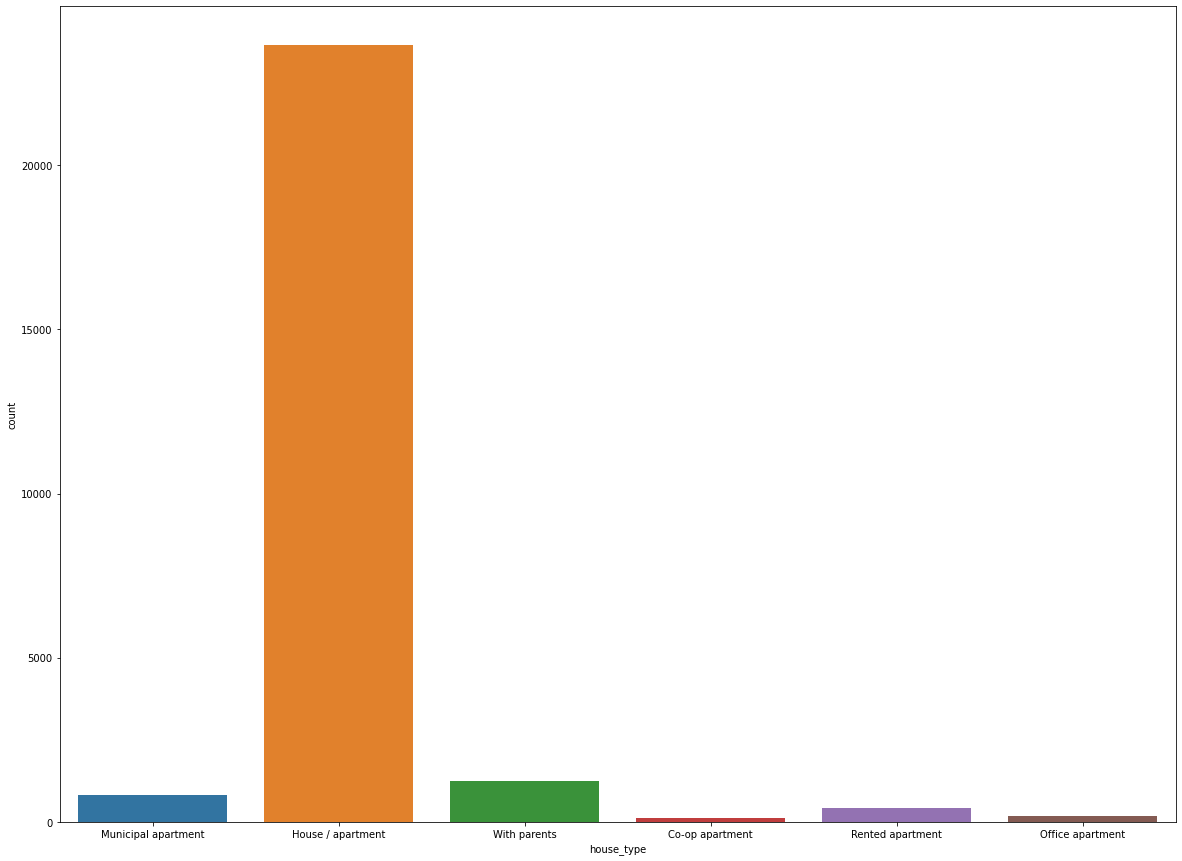

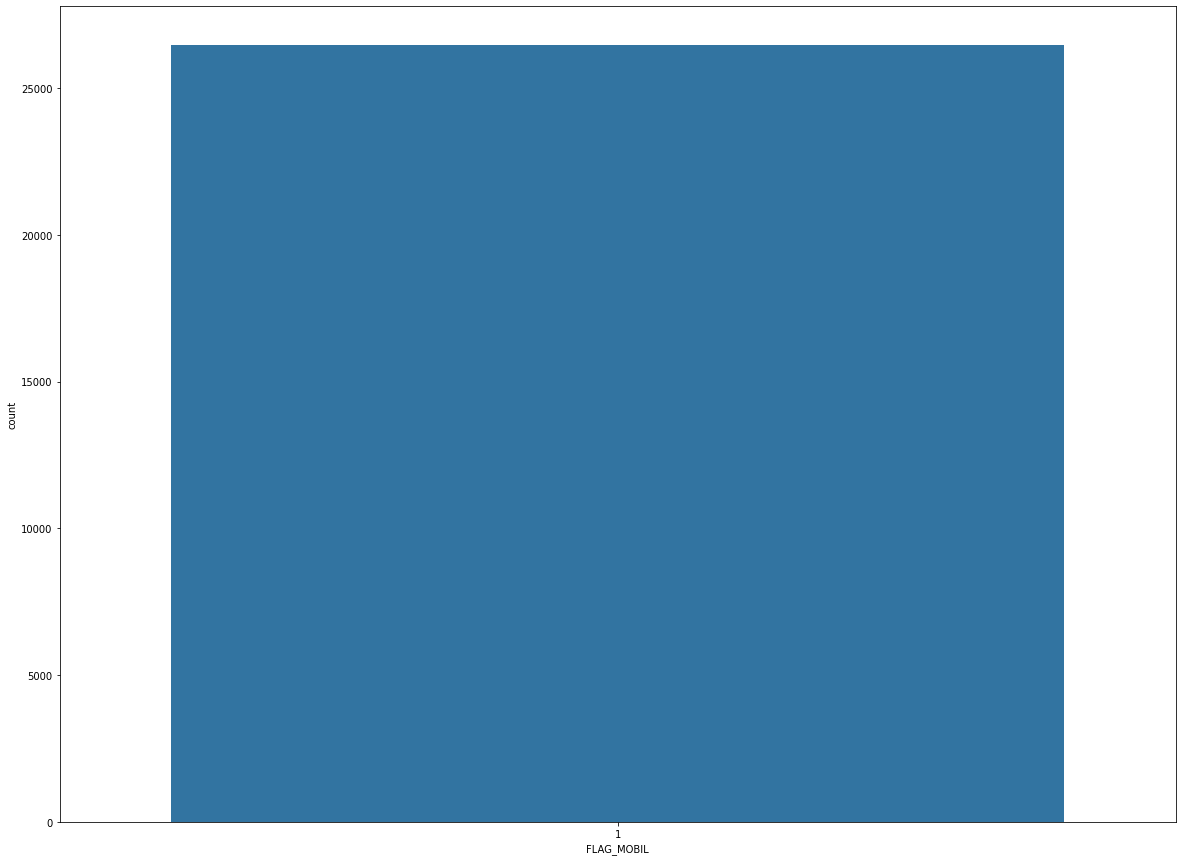

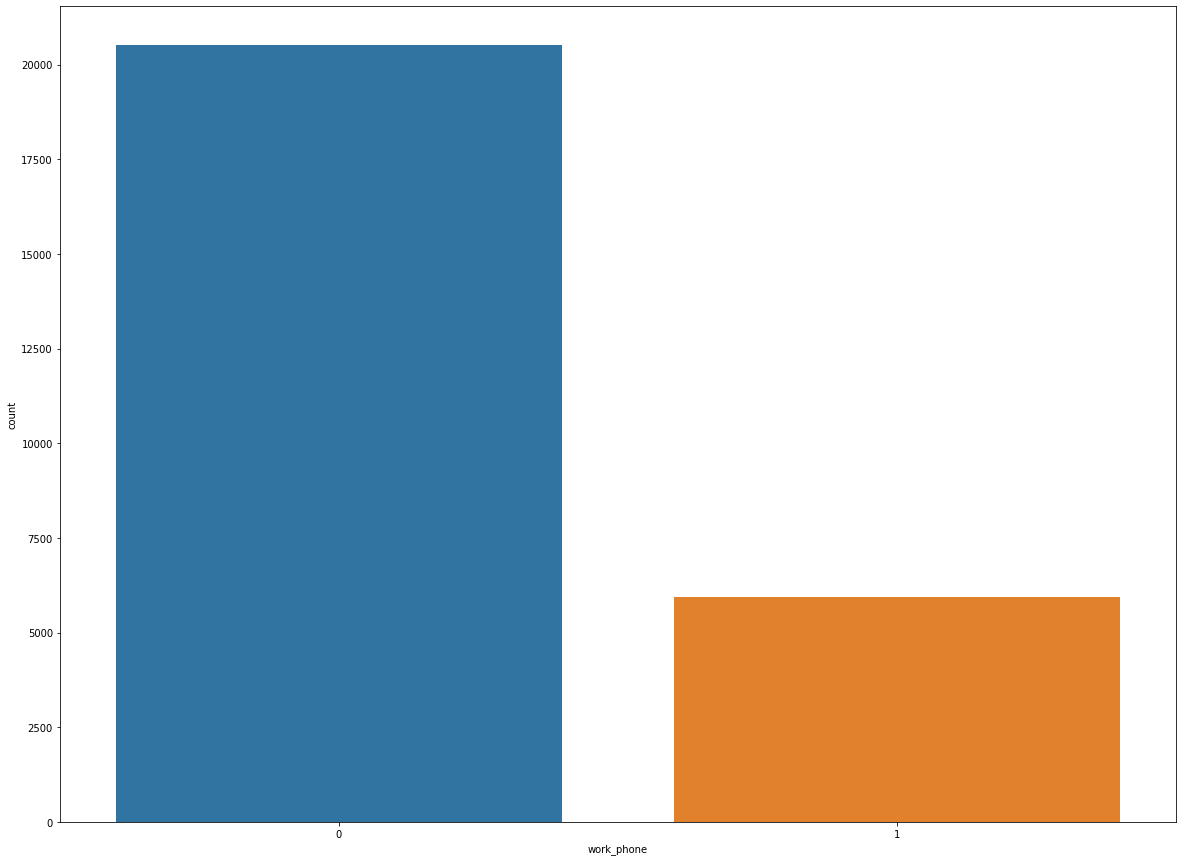

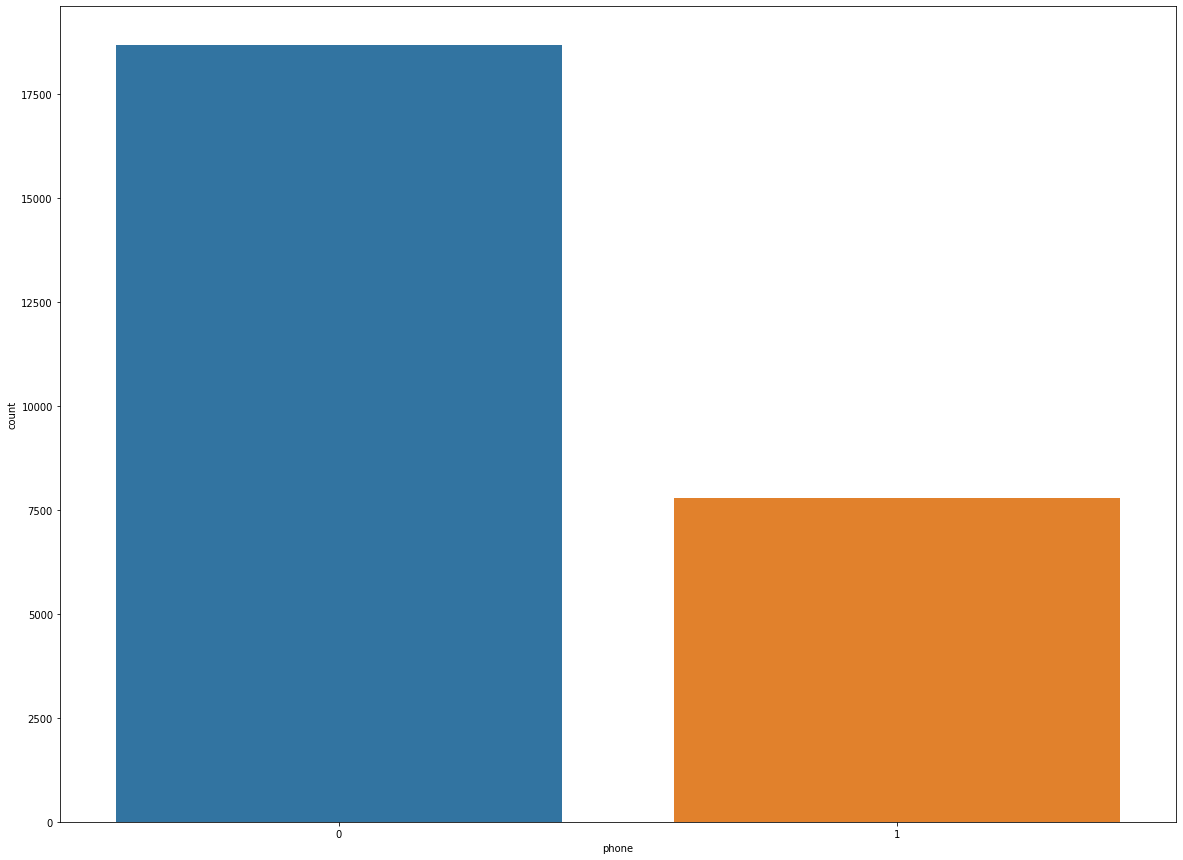

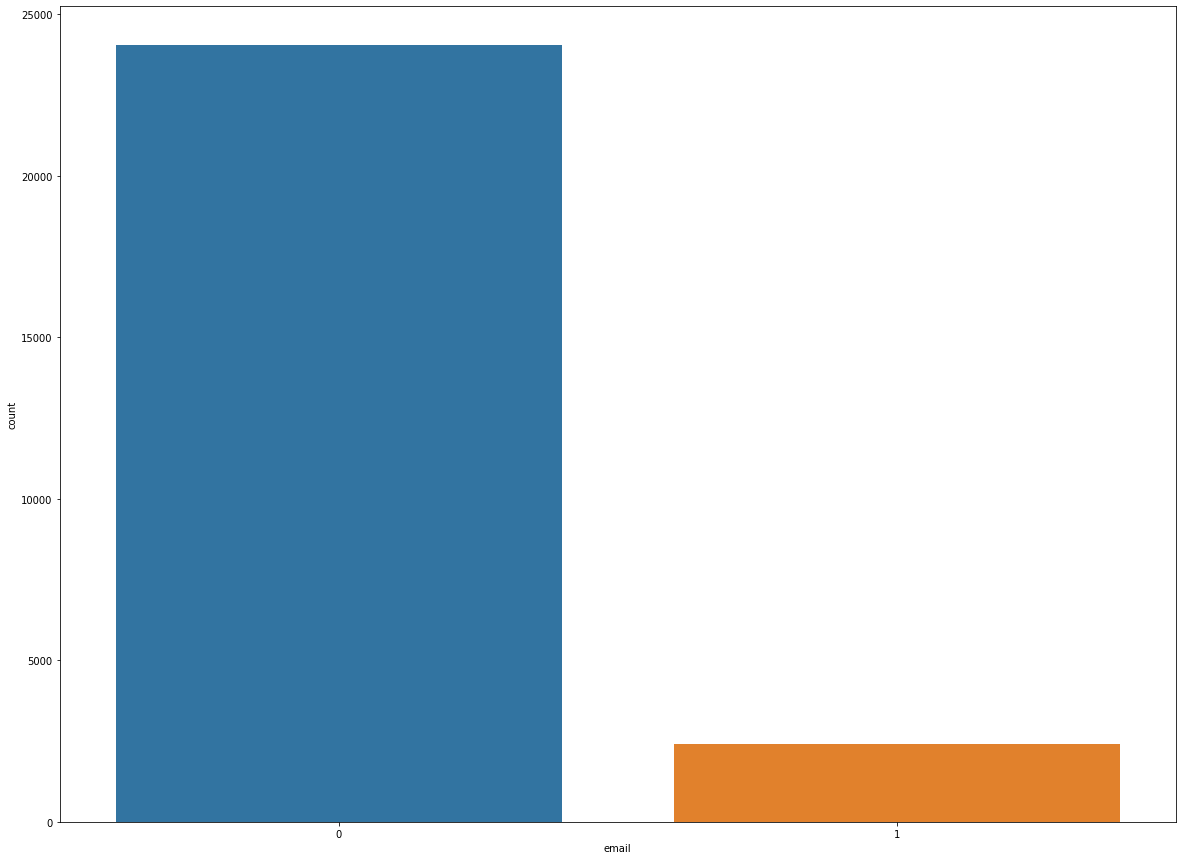

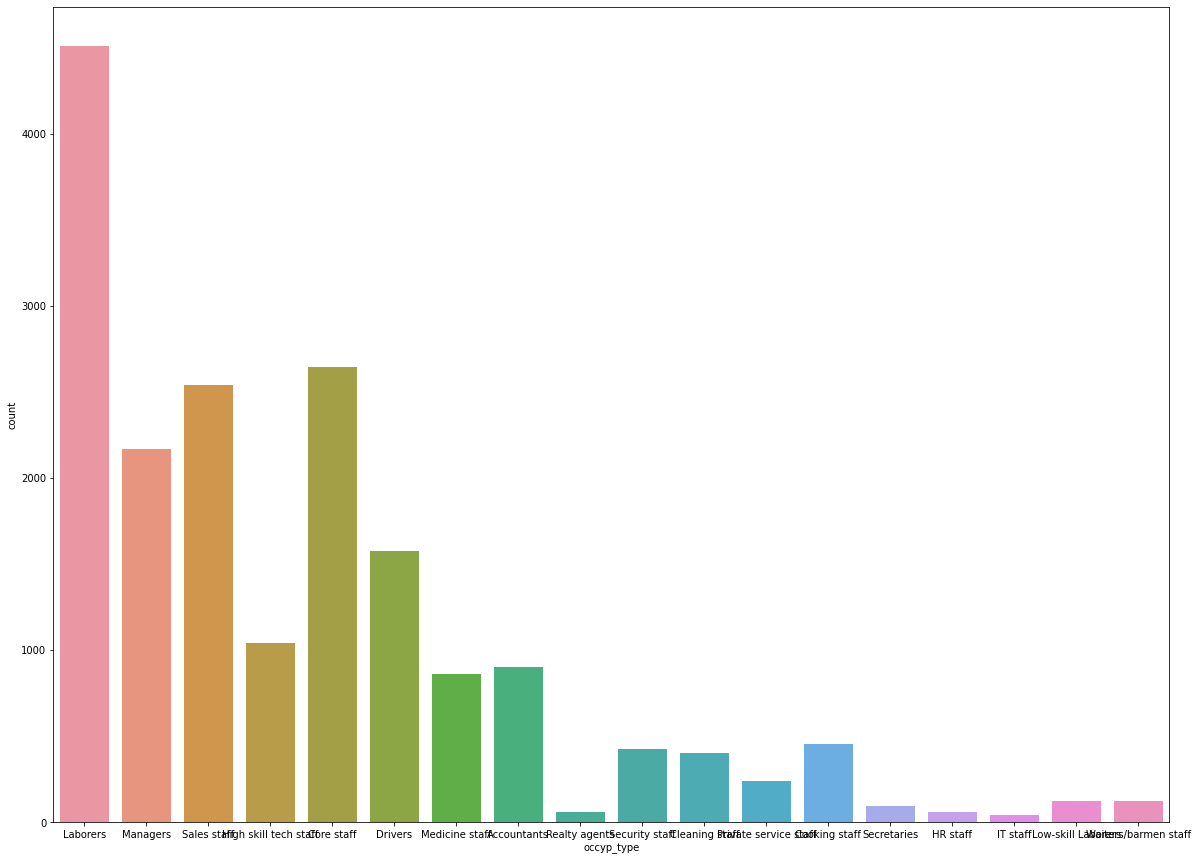

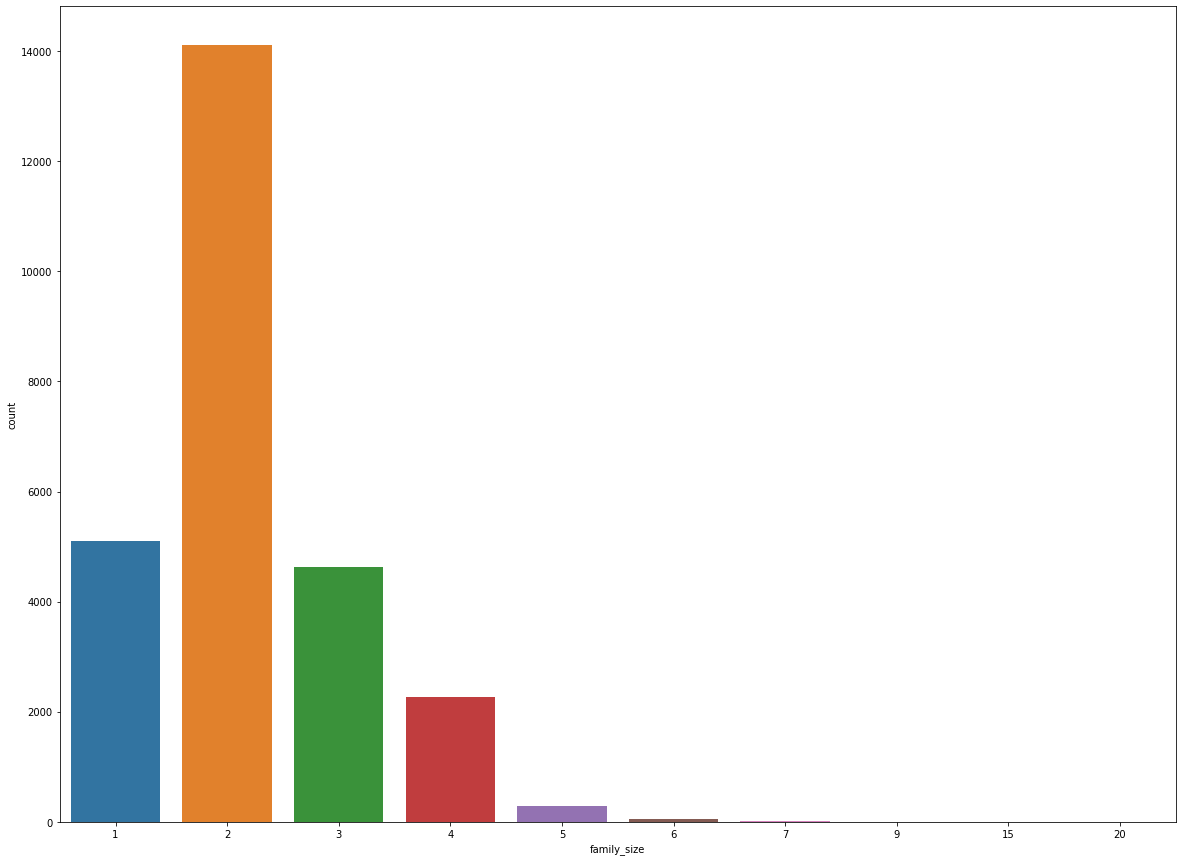

In [ ]:
for col in train_X.columns:
  # 수치형 변수 제외 countplot
  if col in ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']:
    continue
  fig, ax = plt.subplots(figsize=(20,15))
  sns.countplot(x=col, data=train)
  plt.show()

child num에서는 3이상의 row 거의 없음<br>

family size에서는 5 이상의 row 거의 없음<br>

income_type, family type,house type에서는 분류 많으나 분포 불균형하므로 one-hot 사용 좋지 않음<br>

edu_type에서도 higher education, secondary 이외의 값 매우 적음<br>

FLAG_MOBIL 값 하나 -> 삭제

In [ ]:
train_X.drop('FLAG_MOBIL', axis=1, inplace=True)
test_X.drop('FLAG_MOBIL', axis=1, inplace=True)

## 연속형 변수 시각화

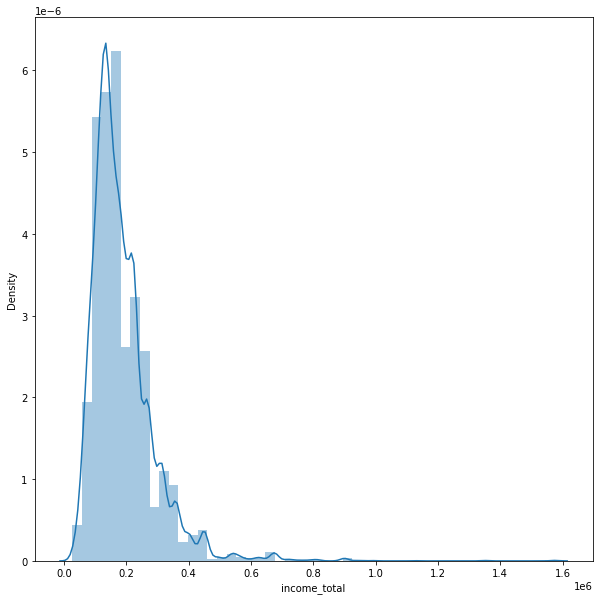

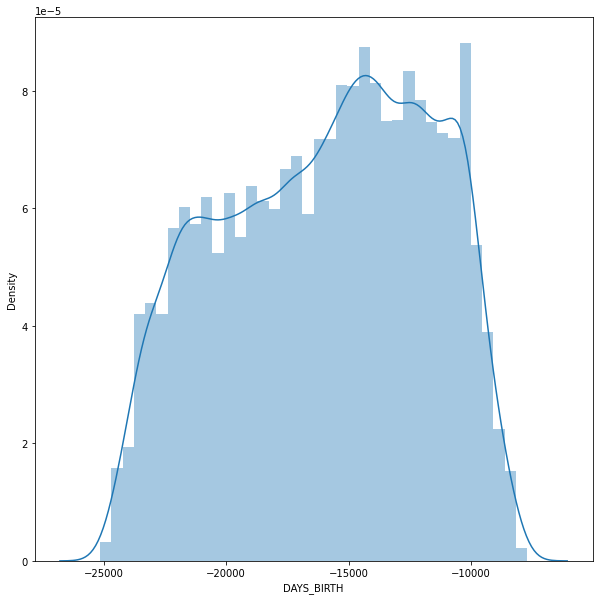

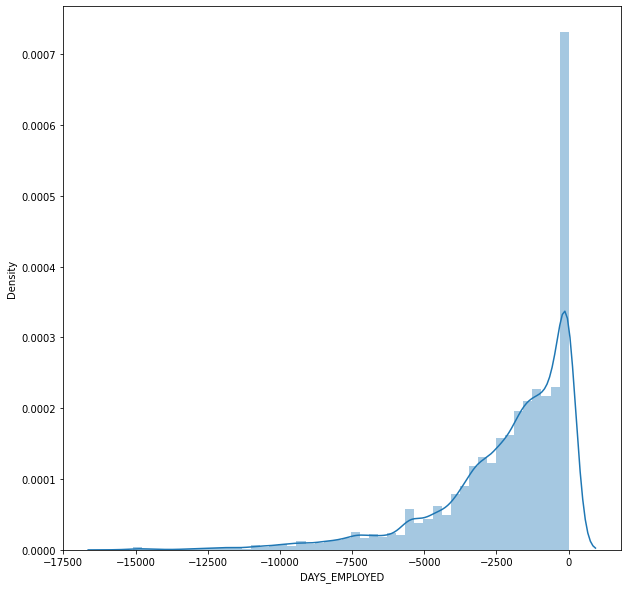

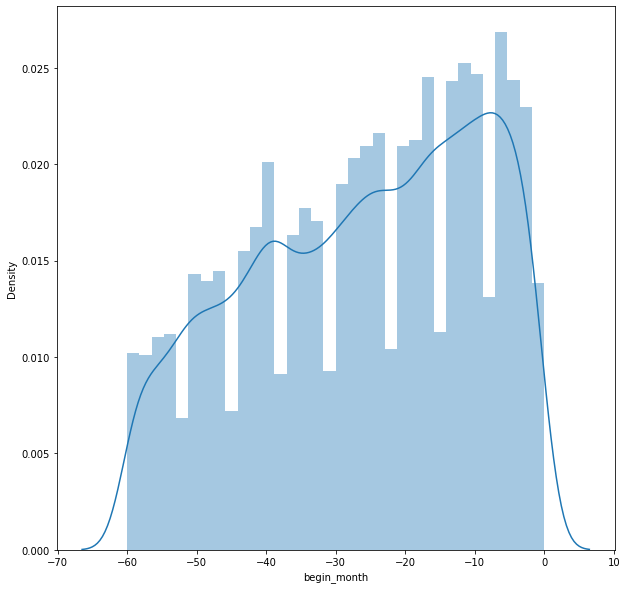

In [ ]:
cols = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']

for col in cols:
 fig, ax = plt.subplots(figsize=(10,10))
 sns.distplot(train_X[col])
 plt.show()

income_type에서는 정규분포와 거리가 먼 곡선 나타남<br>
days_employed 는 결측치를 0으로 채워서 0에서만 압도적으로 높은 수치 나타남<br>
begin_month는 10 간격으로 분포구간<br>
<br>
days_employed, days_birth, begin_month 음수값

# 데이터 전처리

## income type

대부분이 0인 column인 student는 제외

In [ ]:
income_type_oh = pd.get_dummies(train_X['income_type'])
income_type_oh.drop('Student', axis=1, inplace=True)
train_X = pd.concat([train_X, income_type_oh], axis=1)
train_X.drop('income_type', axis=1, inplace=True)
train_X.head()

,gender,car,reality,child_num,income_total,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,Commercial associate,Pensioner,State servant,Working
0,0,0,0,0,202500.0,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2,-6,1,0,0,0
1,0,0,1,1,247500.0,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3,-5,1,0,0,0
2,1,1,1,0,450000.0,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2,-22,0,0,0,1
3,0,0,1,0,202500.0,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2,-37,1,0,0,0
4,0,1,1,0,157500.0,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2,-26,0,0,1,0


In [ ]:
income_type_oh = pd.get_dummies(test_X['income_type'])
income_type_oh.drop('Student', axis=1, inplace=True)
test_X = pd.concat([test_X, income_type_oh], axis=1)
test_X.drop('income_type', axis=1, inplace=True)
test_X.head()

,gender,car,reality,child_num,income_total,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,Commercial associate,Pensioner,State servant,Working
0,1,1,0,0,112500.0,Secondary / secondary special,Civil marriage,House / apartment,-21990,0,0,1,0,NaN,2.0,-60.0,0,1,0,0
1,0,0,1,0,135000.0,Higher education,Married,House / apartment,-18964,-8671,0,1,0,Core staff,2.0,-36.0,0,0,1,0
2,0,0,1,0,69372.0,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,0,Laborers,2.0,-40.0,0,0,0,1
3,1,1,0,0,112500.0,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,0,0,Drivers,2.0,-41.0,1,0,0,0
4,0,1,1,0,225000.0,Higher education,Married,House / apartment,-17822,-9385,1,0,0,Managers,2.0,-8.0,0,0,1,0


## edu_type

In [ ]:
train_X['edu_type_num'] = 0
test_X['edu_type_num'] = 0

for idx, row in enumerate(train_X['edu_type']):
  if train_X['edu_type'][idx] == 'Academic degree':
    train_X['edu_type_num'][idx] = 5
  elif train_X['edu_type'][idx] == 'Higher education':
    train_X['edu_type_num'][idx] = 4
  elif train_X['edu_type'][idx] == 'Secondary / secondary special':
    train_X['edu_type_num'][idx] = 3
  elif train_X['edu_type'][idx] == 'Incomplete higher':
    train_X['edu_type_num'][idx] = 2
  else:
    train_X['edu_type_num'][idx] = 1

for idx, row in enumerate(test_X['edu_type']):
  if test_X['edu_type'][idx] == 'Academic degree':
    test_X['edu_type_num'][idx] = 5
  elif test_X['edu_type'][idx] == 'Higher education':
    test_X['edu_type_num'][idx] = 4
  elif test_X['edu_type'][idx] == 'Secondary / secondary special':
    test_X['edu_type_num'][idx] = 3
  elif test_X['edu_type'][idx] == 'Incomplete higher':
    test_X['edu_type_num'][idx] = 2
  else:
    test_X['edu_type_num'][idx] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-pa

In [ ]:
train_X.head()

,gender,car,reality,child_num,income_total,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,Commercial associate,Pensioner,State servant,Working,edu_type_num
0,0,0,0,0,202500.0,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2,-6,1,0,0,0,4
1,0,0,1,1,247500.0,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3,-5,1,0,0,0,3
2,1,1,1,0,450000.0,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2,-22,0,0,0,1,4
3,0,0,1,0,202500.0,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2,-37,1,0,0,0,3
4,0,1,1,0,157500.0,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2,-26,0,0,1,0,4


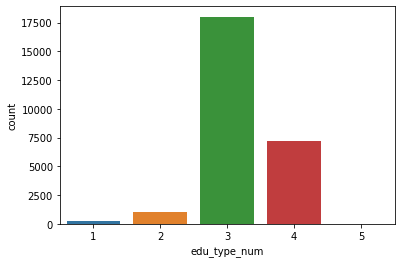

In [ ]:
sns.countplot(x='edu_type_num', data=train_X)

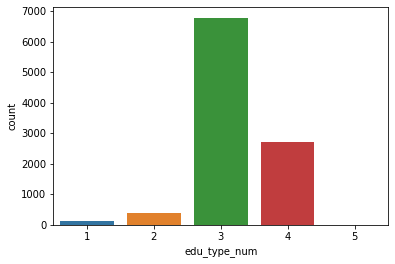

In [ ]:
sns.countplot(x='edu_type_num', data=test_X)

In [ ]:
train_X.drop('edu_type', axis=1, inplace=True)
test_X.drop('edu_type', axis=1, inplace=True)

## family type

In [ ]:
family_type_oh = pd.get_dummies(train_X['family_type'])
train_X = pd.concat([train_X, family_type_oh], axis=1)
train_X.drop('family_type', axis=1, inplace=True)
train_X.head()

,gender,car,reality,child_num,income_total,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,Commercial associate,Pensioner,State servant,Working,edu_type_num,Civil marriage,Married,Separated,Single / not married,Widow
0,0,0,0,0,202500.0,Municipal apartment,-13899,-4709,0,0,0,NaN,2,-6,1,0,0,0,4,0,1,0,0,0
1,0,0,1,1,247500.0,House / apartment,-11380,-1540,0,0,1,Laborers,3,-5,1,0,0,0,3,1,0,0,0,0
2,1,1,1,0,450000.0,House / apartment,-19087,-4434,0,1,0,Managers,2,-22,0,0,0,1,4,0,1,0,0,0
3,0,0,1,0,202500.0,House / apartment,-15088,-2092,0,1,0,Sales staff,2,-37,1,0,0,0,3,0,1,0,0,0
4,0,1,1,0,157500.0,House / apartment,-15037,-2105,0,0,0,Managers,2,-26,0,0,1,0,4,0,1,0,0,0


In [ ]:
family_type_oh = pd.get_dummies(test_X['family_type'])
test_X = pd.concat([test_X, family_type_oh], axis=1)
test_X.drop('family_type', axis=1, inplace=True)
test_X.head()

,gender,car,reality,child_num,income_total,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,Commercial associate,Pensioner,State servant,Working,edu_type_num,Civil marriage,Married,Separated,Single / not married,Widow
0,1,1,0,0,112500.0,House / apartment,-21990,0,0,1,0,NaN,2.0,-60.0,0,1,0,0,3,1,0,0,0,0
1,0,0,1,0,135000.0,House / apartment,-18964,-8671,0,1,0,Core staff,2.0,-36.0,0,0,1,0,4,0,1,0,0,0
2,0,0,1,0,69372.0,House / apartment,-15887,-217,1,1,0,Laborers,2.0,-40.0,0,0,0,1,3,0,1,0,0,0
3,1,1,0,0,112500.0,House / apartment,-19270,-2531,1,0,0,Drivers,2.0,-41.0,1,0,0,0,3,0,1,0,0,0
4,0,1,1,0,225000.0,House / apartment,-17822,-9385,1,0,0,Managers,2.0,-8.0,0,0,1,0,4,0,1,0,0,0


## house_type

과하게 불균등 - onehot 애매 + 주요요인 아님<br>
열 삭제

In [ ]:
train_X.drop('house_type', axis=1, inplace=True)
test_X.drop('house_type', axis=1, inplace=True)

In [ ]:
train_X.head()

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,Commercial associate,Pensioner,State servant,Working,edu_type_num,Civil marriage,Married,Separated,Single / not married,Widow
0,0,0,0,0,202500.0,-13899,-4709,0,0,0,NaN,2,-6,1,0,0,0,4,0,1,0,0,0
1,0,0,1,1,247500.0,-11380,-1540,0,0,1,Laborers,3,-5,1,0,0,0,3,1,0,0,0,0
2,1,1,1,0,450000.0,-19087,-4434,0,1,0,Managers,2,-22,0,0,0,1,4,0,1,0,0,0
3,0,0,1,0,202500.0,-15088,-2092,0,1,0,Sales staff,2,-37,1,0,0,0,3,0,1,0,0,0
4,0,1,1,0,157500.0,-15037,-2105,0,0,0,Managers,2,-26,0,0,1,0,4,0,1,0,0,0


## occyp_type

결측치가 많고 feature 많아서 one-hot 애매
<br>: 열 삭제

In [ ]:
train_X.drop('occyp_type', axis=1, inplace=True)
test_X.drop('occyp_type', axis=1, inplace=True)

In [ ]:
train_X.head()

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,Commercial associate,Pensioner,State servant,Working,edu_type_num,Civil marriage,Married,Separated,Single / not married,Widow
0,0,0,0,0,202500.0,-13899,-4709,0,0,0,2,-6,1,0,0,0,4,0,1,0,0,0
1,0,0,1,1,247500.0,-11380,-1540,0,0,1,3,-5,1,0,0,0,3,1,0,0,0,0
2,1,1,1,0,450000.0,-19087,-4434,0,1,0,2,-22,0,0,0,1,4,0,1,0,0,0
3,0,0,1,0,202500.0,-15088,-2092,0,1,0,2,-37,1,0,0,0,3,0,1,0,0,0
4,0,1,1,0,157500.0,-15037,-2105,0,0,0,2,-26,0,0,1,0,4,0,1,0,0,0


# 연속형 변수

In [ ]:
# 복사한 후 스케일링
train_scaled = train_X.copy()
test_scaled = test_X.copy()

In [ ]:
# 음수값 양수로 변환
train_scaled['DAYS_EMPLOYED'] = -train_scaled['DAYS_EMPLOYED']
train_scaled['DAYS_BIRTH'] = -train_scaled['DAYS_BIRTH']
train_scaled['begin_month'] = -train_scaled['begin_month']

test_scaled['DAYS_EMPLOYED'] = -test_scaled['DAYS_EMPLOYED']
test_scaled['DAYS_BIRTH'] = -test_scaled['DAYS_BIRTH']
test_scaled['begin_month'] = -test_scaled['begin_month']

In [ ]:
# DAYS_EMPLOYED - 양수값, 2년단위, 5000일 이상
for idx, row in enumerate(train_scaled['DAYS_EMPLOYED']):
  if train_scaled['DAYS_EMPLOYED'][idx] > 5000:
    train_scaled['DAYS_EMPLOYED'][idx] = 9
  elif train_scaled['DAYS_EMPLOYED'][idx] == 0:
    train_scaled['DAYS_EMPLOYED'][idx] = 1
  else:
    train_scaled['DAYS_EMPLOYED'][idx] = round(train_scaled['DAYS_EMPLOYED'][idx] / 730) + 2

for idx, row in enumerate(test_scaled['DAYS_EMPLOYED']):
  if test_scaled['DAYS_EMPLOYED'][idx] > 5000:
    test_scaled['DAYS_EMPLOYED'][idx] = 9
  elif test_scaled['DAYS_EMPLOYED'][idx] == 0:
    test_scaled['DAYS_EMPLOYED'][idx] = 1
  else:
    test_scaled['DAYS_EMPLOYED'][idx] = round(test_scaled['DAYS_EMPLOYED'][idx] / 730) + 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: Sett

In [ ]:
# begin_month - 10개월 단위 cut
train_scaled['begin_month'] = train_scaled['begin_month'] / 10
test_scaled['begin_month'] = test_scaled['begin_month'] / 10

# DAYS_BIRTH - 1년 단위 cut
train_scaled['DAYS_BIRTH'] = np.log1p(train_scaled['DAYS_BIRTH'] / 365)
test_scaled['DAYS_BIRTH'] = np.log1p(test_scaled['DAYS_BIRTH'] / 365)

# income_total - 로그 변환
train_scaled['income_total'] = np.log1p(train_scaled['income_total']/1000)
test_scaled['income_total'] = np.log1p(test_scaled['income_total']/1000) 

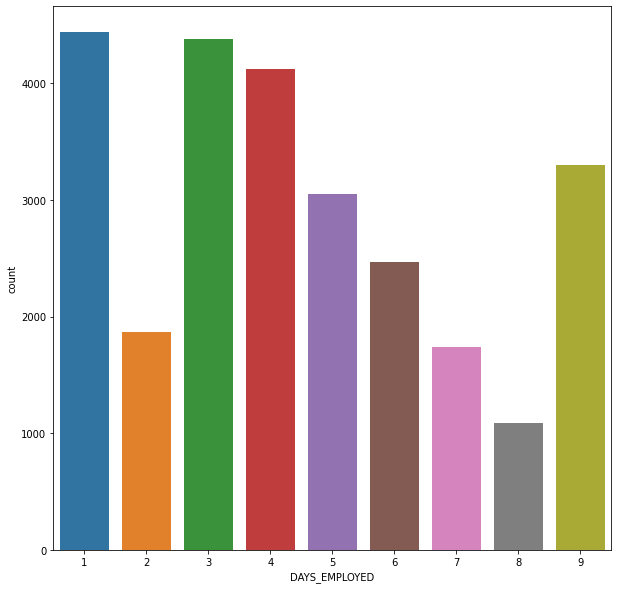

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x='DAYS_EMPLOYED', data=train_scaled)
plt.show()

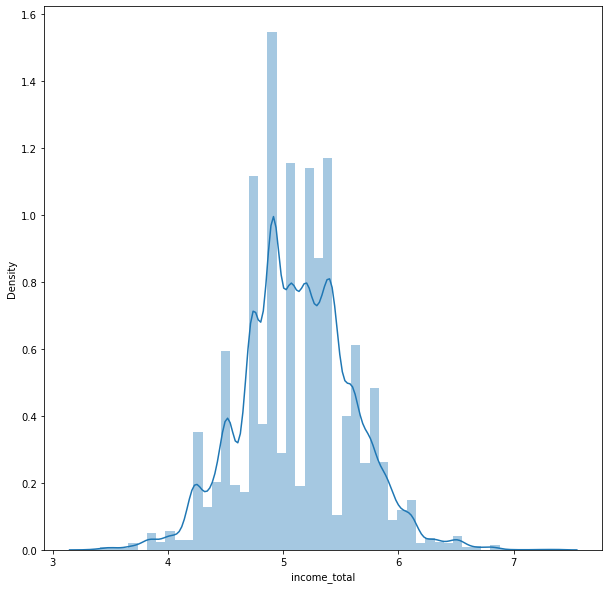

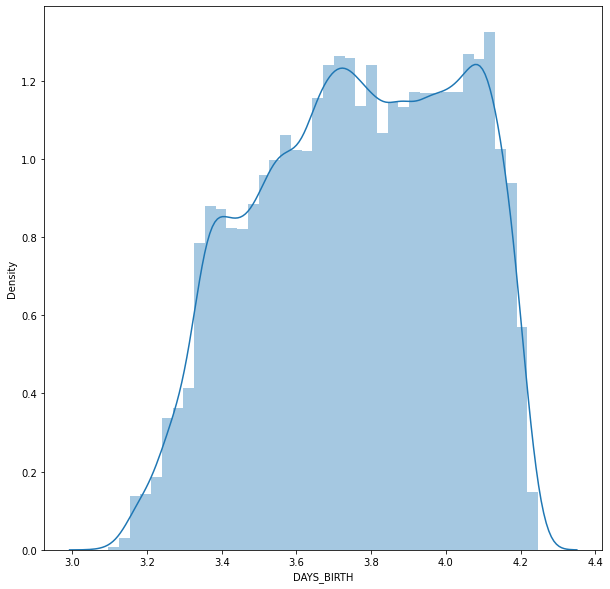

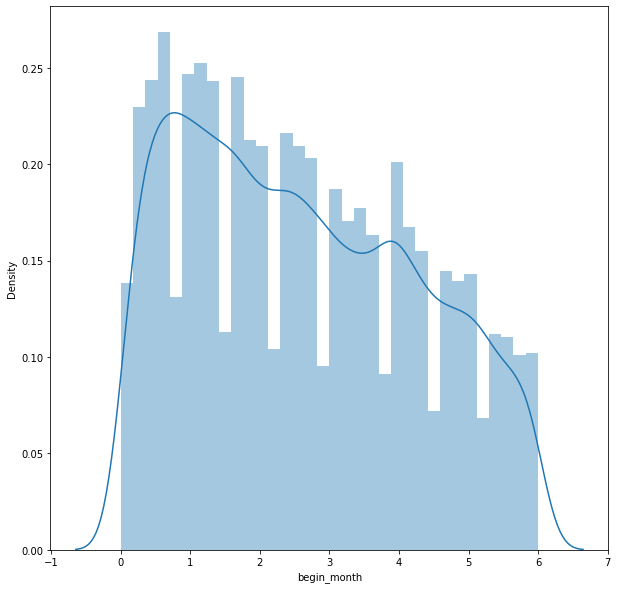

In [ ]:
cols = ['income_total', 'DAYS_BIRTH', 'begin_month']
for col in cols:
  fig, ax = plt.subplots(figsize=(10,10))
  sns.distplot(train_scaled[col])
  plt.show()

# PCA 변수 선택

## PCA 시각화

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# 데이터 표준화
train_standard = StandardScaler().fit_transform(train_X)
test_standard = StandardScaler().fit_transform(test_X)

In [ ]:
train_X.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month', 'Commercial associate', 'Pensioner', 'State servant',
       'Working', 'edu_type_num', 'Civil marriage', 'Married', 'Separated',
       'Single / not married', 'Widow'],
      dtype='object')

In [ ]:
# pca
pca = PCA()
principalComponents = pca.fit_transform(train_standard)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20', 'pc21', 'pc22'])
principalDf.var()

pc1     3.089025e+00
pc2     2.016779e+00
pc3     1.736437e+00
pc4     1.436213e+00
pc5     1.423198e+00
pc6     1.297877e+00
pc7     1.166025e+00
pc8     1.095415e+00
pc9     1.052750e+00
pc10    1.044261e+00
pc11    9.704604e-01
pc12    9.489612e-01
pc13    9.160291e-01
pc14    9.037469e-01
pc15    7.599905e-01
pc16    6.747805e-01
pc17    6.046077e-01
pc18    5.870924e-01
pc19    2.758075e-01
pc20    9.678901e-04
pc21    4.099709e-04
pc22    3.197226e-31
dtype: float64

In [ ]:
pca = PCA()
pca.fit(train_standard)

pcscore = pca.transform(train_standard)

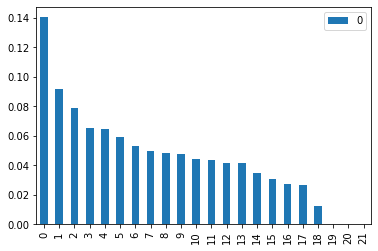

In [ ]:
PC_ratio = pca.explained_variance_ratio_
PC_ratio_df = pd.DataFrame(PC_ratio)
PC_ratio_df.plot(kind='bar')

In [ ]:
sum = 0
for i in range(10):
  sum += PC_ratio[i]
print(sum)

0.6980635032865735


설명력 0.7 이상으로 하기 위해 10개 이상의 요인 선택

## logloss 체크

In [ ]:
from sklearn.metrics import accuracy_score
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
lgbm_clf = LGBMClassifier(n_jobs = -1)
xgb_clf = XGBClassifier(n_jobs = -1)

In [ ]:
def pca_log_loss(clf, feature_num):
  train_score = pca.transform(X_train)[:,:feature_num]
  test_score = pca.transform(X_test)[:,:feature_num]

  clf.fit(train_score, y_train)
  pred = clf.predict(test_score[:,:feature_num])
  cf = confusion_matrix(y_test, pred)
  print(clf.__class__.__name__)
  print("confusion matrix:\n", cf)
  print("accuracy score : ", accuracy_score(y_test, pred))
  y_proba = clf.predict_proba(test_score)
  y_val_onehot = pd.get_dummies(y_test)
  print("log loss: ",log_loss(y_val_onehot, y_proba))

### 연속형 변수 scale X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2)

In [ ]:
pca_log_loss(rf_clf, len(train_X.columns))
pca_log_loss(lr_clf, len(train_X.columns))
pca_log_loss(lgbm_clf, len(train_X.columns))
pca_log_loss(xgb_clf, len(train_X.columns))

RandomForestClassifier
confusion matrix:
 [[ 248   91  309]
 [  95  527  644]
 [ 234  449 2695]]
accuracy score :  0.6557067271352985
log loss:  1.6758532492324618


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression
confusion matrix:
 [[   0    0  648]
 [   0    0 1266]
 [   0    0 3378]]
accuracy score :  0.6383219954648526
log loss:  0.8728291847676328
LGBMClassifier
confusion matrix:
 [[  21    4  623]
 [   4   81 1181]
 [  11   44 3323]]
accuracy score :  0.6472033257747544
log loss:  0.8304490923458836
XGBClassifier
confusion matrix:
 [[   1    0  647]
 [   0   13 1253]
 [   0    6 3372]]
accuracy score :  0.6398337112622827
log loss:  0.8677814238629419


### 연속형 변수 scaled

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_scaled, train_y, test_size=0.2)

In [ ]:
pca_log_loss(rf_clf, 10)
pca_log_loss(lr_clf, 10)
pca_log_loss(lgbm_clf, 10)
pca_log_loss(xgb_clf, 10)

RandomForestClassifier
confusion matrix:
 [[ 118   89  429]
 [  45  393  796]
 [  95  282 3045]]
accuracy score :  0.671957671957672
log loss:  0.8693688055326972


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression
confusion matrix:
 [[   0    1  635]
 [   0    5 1229]
 [   0    1 3421]]
accuracy score :  0.6473922902494331
log loss:  0.8609534938703636
LGBMClassifier
confusion matrix:
 [[  11   70  555]
 [   5  184 1045]
 [   4   92 3326]]
accuracy score :  0.6653439153439153
log loss:  0.8193329423619288
XGBClassifier
confusion matrix:
 [[   2   30  604]
 [   2   82 1150]
 [   1   40 3381]]
accuracy score :  0.6547619047619048
log loss:  0.8475783965687633


## 상관계수 분석

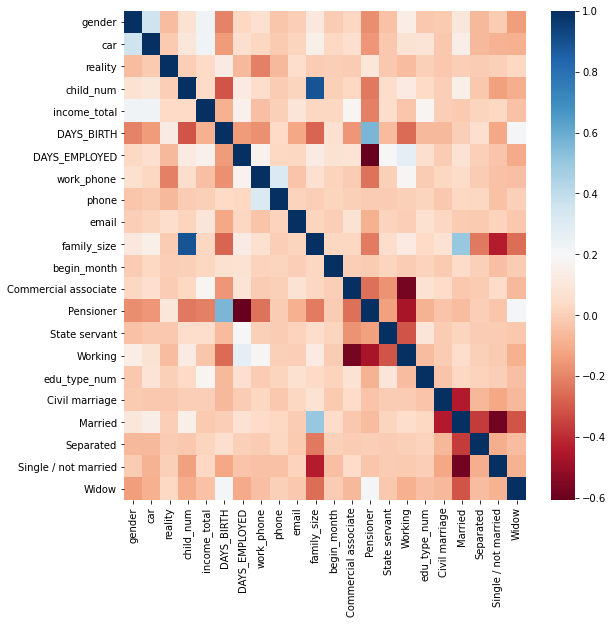

In [ ]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = train_scaled.corr()
sns.heatmap(corr, cmap='RdBu')

In [ ]:
# family_type - Married, Separated, Single / Not Married, Widow
# family num, child_num과 상관계수 높게 나타남. 중요도 떨어짐.
train_scaled.drop(['Married', 'Separated', 'Single / not married', 'Widow'], axis=1, inplace=True)
test_scaled.drop(['Married', 'Separated', 'Single / not married', 'Widow'], axis=1, inplace=True)

In [ ]:
# family num과 상관계수 높게 나타남. 정보 포함됨
train_scaled.drop('child_num', axis=1, inplace=True)
test_scaled.drop('child_num', axis=1, inplace=True)

### logloss 체크

In [ ]:
pca_log_loss(rf_clf, 10)
pca_log_loss(lr_clf, 10)
pca_log_loss(lgbm_clf, 10)
pca_log_loss(xgb_clf, 10)

RandomForestClassifier
confusion matrix:
 [[ 115   94  427]
 [  42  394  798]
 [  93  299 3030]]
accuracy score :  0.668745275888133
log loss:  0.8710928879573197


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression
confusion matrix:
 [[   0    1  635]
 [   0    5 1229]
 [   0    1 3421]]
accuracy score :  0.6473922902494331
log loss:  0.8609534938703636
LGBMClassifier
confusion matrix:
 [[  11   70  555]
 [   5  184 1045]
 [   4   92 3326]]
accuracy score :  0.6653439153439153
log loss:  0.8193329423619288
XGBClassifier
confusion matrix:
 [[   2   30  604]
 [   2   82 1150]
 [   1   40 3381]]
accuracy score :  0.6547619047619048
log loss:  0.8475783965687633


# 전진 선택법

https://blog.naver.com/962300/222292807454

In [ ]:
from sklearn import preprocessing
import time
import itertools
import statsmodels.api as sm
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

Automatically created module for IPython interactive environment


In [ ]:
# 변수선택을 통해 형성한 모델의 AIC를 구하는 함수
# AIC가 낮을 수록 모델이 좋다고 평가된다.
def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}

In [ ]:
# getBest : 가장 낮은 AIC를 가지는 모델을 선택하고 저장하는 함수

def getBest(X,y,k):
    tic = time.time()      # 시작 시간
    results = []           # 결과 저장 공간
    # for combo in itertools.combinations(X.columns.difference(['const'],k)):
    for combo in itertools.combinations(X,k):

		# 각 변수 조합을 고려한 경우의수

        # combo = (list(combo)+['const'])
        combo = (list(combo))
        # 상수항을 추가하여 combo를 결성
        
        results.append(processSubset(X,y,feature_set = combo)) # 모델링된것을 저장
        
        # 만약 k=2이면 여기서 두가지 변수만 뽑아서 경우의 수를 분석하여
        # 저장 후 그 중 AIC가 가장 낮은 모델을 선택하도록 함
	
    models = pd.DataFrame(results) # 데이터프레임으로 모델결과 변환
    best_model = models.loc[models['AIC'].argmin()] # argmin은 최소값의 인덱스를 뽑는 함수
    toc = time.time()       # 종료 시간
    print("Processed", models.shape[0], "models on", k, "predictors in",(toc - tic),"seconds.")
    
    return best_model

In [ ]:
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [ ]:
#### 전진선택법 모델
def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [ ]:
def forward_val(X, y):
  Forward_best_model = forward_model(X=X, y=y)
  print(Forward_best_model.summary())
  print(Forward_best_model.aic)
  return Forward_best_model

In [ ]:
train_scaled['const'] = 0
X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled = train_test_split(train_scaled, train_y,  test_size = 0.25)
feature_columns = train_scaled.columns
fitted_full_model = processSubset(X=train_scaled, y=train_y, feature_set = feature_columns)

In [ ]:
# AIC 낮을수록 우수
print(getBest(X=train_scaled, y = train_y, k=2))

Processed 153 models on 2 predictors in 1.2652392387390137 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                56171.8
Name: 67, dtype: object


In [ ]:
Forward_best_model = forward_val(train_scaled, train_y)

Processed  17 models on 1 predictors in 0.11842608451843262
Selected predictors: ['DAYS_BIRTH', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f067af5b5d0>
Processed  16 models on 2 predictors in 0.14332175254821777
Selected predictors: ['DAYS_BIRTH', 'begin_month', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f067af4d9d0>
Processed  15 models on 3 predictors in 0.1628725528717041
Selected predictors: ['DAYS_BIRTH', 'begin_month', 'income_total', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f067af4d4d0>
Processed  14 models on 4 predictors in 0.21093273162841797
Selected predictors: ['DAYS_BIRTH', 'begin_month', 'income_total', 'Pensioner', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f067af5b1d0>
Processed  13 models on 5 predictors in 0.21482205390930176
Selected predictors: ['DAYS_BIRTH', 'begin_month', 'inc

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [ ]:
Forward_best_model.aic

55791.95663445856

In [ ]:
train_scaled.drop('const', axis=1, inplace=True)

In [ ]:
# logloss 출력
def model_func(data_X, data_y, model, test_size=0.2):
  X_train, X_val, y_train, y_val = train_test_split(data_X, data_y,
                 stratify = train_y, 
                 test_size = 0.2
                 )
  model.fit(X_train, y_train)

  y_proba = model.predict_proba(X_val)
  y_val_onehot = pd.get_dummies(y_val)

  print(log_loss(y_val_onehot, y_proba))

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(clf, train_data, train_y, test_scaled):

    folds=StratifiedKFold(n_splits=5, shuffle=True)
    outcomes=[]
    sub=np.zeros((test_scaled.shape[0], 3))  

    for n_fold, (train_index, val_index) in enumerate(folds.split(train_data, train_y)):
        X_train, X_val = train_data.iloc[train_index], train_data.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]

        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)

        logloss=log_loss(y_val, predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_scaled)
        
    mean_outcome=np.mean(outcomes)
    
    print("clf : {0}, Mean:{1}".format(clf.__class__.__name__, mean_outcome))
    return sub/folds.n_splits

In [ ]:
selc_features = ['DAYS_BIRTH', 'begin_month', 'income_total', 'Pensioner', 'family_size', 'email', 'reality', 'Civil marriage', 'Commercial associate', 'Working', 'State servant', 'edu_type_num', 'DAYS_EMPLOYED']

In [ ]:
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
lgbm_clf = LGBMClassifier(n_jobs = -1)
xgb_clf = XGBClassifier(n_jobs = -1)

In [ ]:
run_kfold(rf_clf, train_scaled[selc_features], train_y, test_scaled[selc_features])
run_kfold(lr_clf, train_scaled[selc_features], train_y, test_scaled[selc_features])
run_kfold(lgbm_clf, train_scaled[selc_features], train_y, test_scaled[selc_features])
run_kfold(xgb_clf, train_scaled[selc_features], train_y, test_scaled[selc_features])

FOLD 0 : logloss:0.9003213370979791
FOLD 1 : logloss:0.9096934827194613
FOLD 2 : logloss:0.9137046532919191
FOLD 3 : logloss:0.9040112723745318
FOLD 4 : logloss:0.9276746980160454
clf : RandomForestClassifier, Mean:0.9110810886999874


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 0 : logloss:0.8639265826434266


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 1 : logloss:0.8636071102939776


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 2 : logloss:0.8641467450758109


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 3 : logloss:0.8598189372237858


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 4 : logloss:0.8612438602446134
clf : LogisticRegression, Mean:0.862548647096323
FOLD 0 : logloss:0.7707796441907835
FOLD 1 : logloss:0.7761838807776781
FOLD 2 : logloss:0.7745460718245687
FOLD 3 : logloss:0.7721779850397261
FOLD 4 : logloss:0.7767754305351959
clf : LGBMClassifier, Mean:0.7740926024735904
FOLD 0 : logloss:0.8052450459047825
FOLD 1 : logloss:0.7899598890446684
FOLD 2 : logloss:0.8070066155659141
FOLD 3 : logloss:0.792540367089312
FOLD 4 : logloss:0.8018831053695569
clf : XGBClassifier, Mean:0.7993270045948468


array([[0.10410971, 0.15975572, 0.73613458],
       [0.11108175, 0.18349958, 0.70541866],
       [0.11345179, 0.18217993, 0.70436827],
       ...,
       [0.09225013, 0.1531383 , 0.75461156],
       [0.09144923, 0.17127306, 0.7372777 ],
       [0.11111215, 0.22312209, 0.66576575]])

LGBM, XGB가 우수한 성능을 보임

## lgbm 시각화

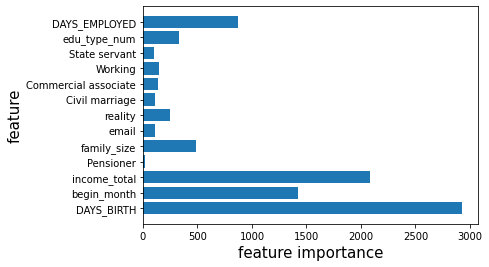

In [ ]:
plt.barh(np.arange(train_scaled[selc_features].shape[1]), lgbm_clf.feature_importances_, align='center')
plt.yticks(np.arange(train_scaled[selc_features].shape[1]), train_scaled[selc_features].columns)
plt.ylim(-1, train_scaled[selc_features].shape[1])
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

연속형 변수 네개에 영향을 매우 많이 받음.

## xgb 시각화

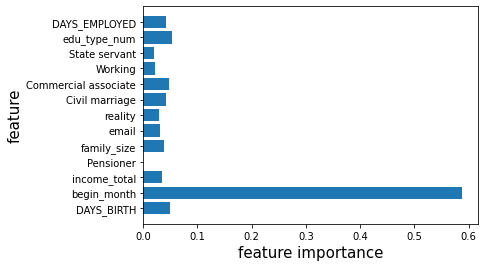

In [ ]:
plt.barh(np.arange(train_scaled[selc_features].shape[1]), xgb_clf.feature_importances_, align='center')
plt.yticks(np.arange(train_scaled[selc_features].shape[1]), train_scaled[selc_features].columns)
plt.ylim(-1, train_scaled[selc_features].shape[1])
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

begin_month의 영향을 매우 많이 받음.

In [ ]:
train_scaled_new = train_scaled[selc_features].drop(['State servant', 'Working'], axis=1)
test_scaled_new = test_scaled[selc_features].drop(['State servant', 'Working'], axis=1)

# 타겟 개수 확인

In [ ]:
# target 확인
def target_distrib(df):
  print('target_0 : ', df[df['0']>0.5].count())
  print('target_1 : ', df[df['1']>0.5].count())
  print('target_2 : ', df[df['2']>0.5].count())

# 제출함수

In [ ]:
def Submission(data):
  submission_file = sample_submission.copy()
  submission_file.loc[:,1:] = data
  submission_file.to_csv('/content/gdrive/My Drive/Colab Notebooks/credit/submission_new.csv', index=False)
  return submission_file

# 파라미터 최적화

## optuna, 함수 선언

In [ ]:
# colab 새로 열때마다 실행해야함
!pip install optuna

In [ ]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

In [ ]:
X = pd.get_dummies(train_X)
X_test = pd.get_dummies(test_X)
y = train_y

In [ ]:
def lgbm(trial: Trial) -> float:
    params_lgb = {
        "verbosity": -1,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "n_estimators": 10000,
        "objective": "multiclass",
        "metric": "multi_logloss",
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 3e-5),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 9e-2),
        "max_depth": trial.suggest_int("max_depth", 1, 20),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "subsample": trial.suggest_float("subsample", 0.3, 1.0),
        "subsample_freq": trial.suggest_int("subsample_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "max_bin": trial.suggest_int("max_bin", 200, 500),
    }
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

    model = LGBMClassifier(**params_lgb)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        early_stopping_rounds=100,
        verbose=False,
    )

    lgb_pred = model.predict_proba(X_valid)
    log_score = log_loss(y_valid, lgb_pred)
    
    return log_score

In [ ]:
def xgb(trial: Trial) -> float:
    params_xgb = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "n_estimators": 10000,
        "objective": "multiclass",
        "metric": "multi_logloss",
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 3e-5),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 9e-2),
        "max_depth": trial.suggest_int("max_depth", 1, 20),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "subsample": trial.suggest_float("subsample", 0.3, 1.0),
        "subsample_freq": trial.suggest_int("subsample_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "max_bin": trial.suggest_int("max_bin", 200, 500),
    }
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

    model = XGBClassifier(**params_xgb)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        early_stopping_rounds=100,
        verbose=False,
    )

    xgb_pred = model.predict_proba(X_valid)
    log_score = log_loss(y_valid, xgb_pred)
    
    return log_score

## train_X

In [ ]:
sampler = TPESampler()
study_1 = optuna.create_study(
    study_name="lgbm_parameter_opt",
    direction="minimize",
    sampler=sampler,
)
study_1.optimize(lgbm, n_trials=15)
print("Best Score:", study_1.best_value)
print("Best trial:", study_1.best_trial.params)

[I 2021-06-02 07:35:31,703] A new study created in memory with name: lgbm_parameter_opt
[I 2021-06-02 07:35:45,207] Trial 0 finished with value: 0.7642623003592702 and parameters: {'learning_rate': 0.06541577464385229, 'reg_alpha': 1.1596476792984697e-05, 'reg_lambda': 0.04918222861117641, 'max_depth': 4, 'num_leaves': 139, 'colsample_bytree': 0.4456386923510978, 'subsample': 0.3811430900898158, 'subsample_freq': 2, 'min_child_samples': 44, 'max_bin': 340}. Best is trial 0 with value: 0.7642623003592702.
[I 2021-06-02 07:36:02,599] Trial 1 finished with value: 0.7295132953198206 and parameters: {'learning_rate': 0.07487174070493187, 'reg_alpha': 2.2206698975839614e-05, 'reg_lambda': 0.0550777495681372, 'max_depth': 5, 'num_leaves': 87, 'colsample_bytree': 0.7059737740780426, 'subsample': 0.96416952935545, 'subsample_freq': 5, 'min_child_samples': 18, 'max_bin': 427}. Best is trial 1 with value: 0.7295132953198206.
[I 2021-06-02 07:36:27,427] Trial 2 finished with value: 0.7495410304557

Best Score: 0.7214998672988443
Best trial: {'learning_rate': 0.07939028799292865, 'reg_alpha': 2.9200629582060786e-05, 'reg_lambda': 0.06003581663140305, 'max_depth': 20, 'num_leaves': 67, 'colsample_bytree': 0.41084931404123226, 'subsample': 0.5370709741397256, 'subsample_freq': 8, 'min_child_samples': 49, 'max_bin': 270}


In [ ]:
sampler = TPESampler()
study_2 = optuna.create_study(
    study_name="xgb_parameter_opt",
    direction="minimize",
    sampler=sampler,
)
study_2.optimize(xgb, n_trials=15)
print("Best Score:", study_2.best_value)
print("Best trial:", study_2.best_trial.params)

[I 2021-06-02 07:42:37,409] A new study created in memory with name: xgb_parameter_opt
[I 2021-06-02 07:43:36,209] Trial 0 finished with value: 0.7205101747797183 and parameters: {'learning_rate': 0.04374862495735462, 'reg_alpha': 2.186194042962602e-05, 'reg_lambda': 0.048763850267112344, 'max_depth': 12, 'num_leaves': 7, 'colsample_bytree': 0.47284736400027677, 'subsample': 0.37377272959859725, 'subsample_freq': 3, 'min_child_samples': 62, 'max_bin': 350}. Best is trial 0 with value: 0.7205101747797183.
[I 2021-06-02 07:44:55,814] Trial 1 finished with value: 0.7415648854133664 and parameters: {'learning_rate': 0.05138860606110691, 'reg_alpha': 2.9005416875722704e-05, 'reg_lambda': 0.021060776946415494, 'max_depth': 11, 'num_leaves': 22, 'colsample_bytree': 0.8791076776516749, 'subsample': 0.3974528781509382, 'subsample_freq': 4, 'min_child_samples': 100, 'max_bin': 233}. Best is trial 0 with value: 0.7205101747797183.
[I 2021-06-02 07:45:36,985] Trial 2 finished with value: 0.7311890

Best Score: 0.7092735013901309
Best trial: {'learning_rate': 0.01013263382572705, 'reg_alpha': 1.5851033611154568e-05, 'reg_lambda': 0.0025230726228266547, 'max_depth': 20, 'num_leaves': 255, 'colsample_bytree': 0.4069287933034071, 'subsample': 0.5307811111890459, 'subsample_freq': 6, 'min_child_samples': 11, 'max_bin': 224}


In [ ]:
xgb_best = XGBClassifier(learning_rate=0.030995909860576584, reg_alpha=1.5616803877828854e-05, reg_lambda=0.08710190596263928, max_depth=16, num_leaves=54, colsample_bytree=0.7008154407450976, subsample=0.6978293427238714, subsample_freq=5, min_child_samples=26, max_bin=309)

In [ ]:
xgb_train_X = run_kfold(xgb_best, train_X, train_y, test_X)

FOLD 0 : logloss:0.8492926519338776
FOLD 1 : logloss:0.8451583220293282
FOLD 2 : logloss:0.8474195238841411
FOLD 3 : logloss:0.8442241887957495
FOLD 4 : logloss:0.8467088676179386
clf : XGBClassifier, Mean:0.846560710852207


In [ ]:
df1 = Submission(xgb_train_X)
df1.drop('index', inplace=True, axis=1)
df1.head()

,0,1,2
0,0.208634,0.243048,0.548317
1,0.245325,0.278705,0.475971
2,0.194721,0.230953,0.574326
3,0.218141,0.248273,0.533586
4,0.199948,0.268445,0.531607


In [ ]:
submission_file_1 = sample_submission.copy()
submission_file_1.loc[:,1:] = xgb_train_X

In [ ]:
target_distrib(df1)

target_0 :  0    0
1    0
2    0
dtype: int64
target_1 :  0    85
1    85
2    85
dtype: int64
target_2 :  0    6399
1    6399
2    6399
dtype: int64


## train_scaled_new

In [ ]:
X = pd.get_dummies(train_scaled_new)
X_test = pd.get_dummies(test_scaled_new)
y = train_y

In [ ]:
sampler = TPESampler()
study_3 = optuna.create_study(
    study_name="xgb_parameter_opt",
    direction="minimize",
    sampler=sampler,
)
study_3.optimize(xgb, n_trials=15)
print("Best Score:", study_3.best_value)
print("Best trial:", study_3.best_trial.params)

[I 2021-06-02 08:01:24,296] A new study created in memory with name: xgb_parameter_opt
[I 2021-06-02 08:02:25,029] Trial 0 finished with value: 0.7532758972858686 and parameters: {'learning_rate': 0.03676763520005479, 'reg_alpha': 1.4252252809520492e-05, 'reg_lambda': 0.06159719540197559, 'max_depth': 17, 'num_leaves': 63, 'colsample_bytree': 0.9055482356305177, 'subsample': 0.8213156231970986, 'subsample_freq': 10, 'min_child_samples': 76, 'max_bin': 494}. Best is trial 0 with value: 0.7532758972858686.
[I 2021-06-02 08:02:30,288] Trial 1 finished with value: 1.0906161046442622 and parameters: {'learning_rate': 0.017918683625471138, 'reg_alpha': 2.3002937957342357e-05, 'reg_lambda': 0.07030260527916578, 'max_depth': 5, 'num_leaves': 67, 'colsample_bytree': 0.6127712959886203, 'subsample': 0.4766472485215716, 'subsample_freq': 4, 'min_child_samples': 85, 'max_bin': 467}. Best is trial 0 with value: 0.7532758972858686.
[I 2021-06-02 08:03:45,160] Trial 2 finished with value: 0.731233006

Best Score: 0.7195535879958779
Best trial: {'learning_rate': 0.026104360527297324, 'reg_alpha': 1.01957516695902e-05, 'reg_lambda': 0.002825831728232066, 'max_depth': 15, 'num_leaves': 29, 'colsample_bytree': 0.70801603070394, 'subsample': 0.6441399169535188, 'subsample_freq': 7, 'min_child_samples': 8, 'max_bin': 412}


In [ ]:
xgb_best = XGBClassifier(learning_rate=0.07810518718309338, reg_alpha=3.354866414052101e-07, reg_lambda=0.0014253533265836831, max_depth=20, num_leaves=70, colsample_bytree=0.4151204522198854, subsample=0.994820481180758, subsample_freq=1, min_child_samples=36, max_bin=386)

In [ ]:
xgb_scaled_new = run_kfold(xgb_best, train_scaled_new, train_y, test_scaled_new)

FOLD 0 : logloss:0.7258526587504006
FOLD 1 : logloss:0.726220282441947
FOLD 2 : logloss:0.719066387049092
FOLD 3 : logloss:0.7061956804833618
FOLD 4 : logloss:0.7119846745034913
clf : XGBClassifier, Mean:0.7178639366456585


In [ ]:
df2 = Submission(xgb_scaled_new)
df2.drop('index', inplace=True, axis=1)
df2.head()

,0,1,2
0,0.062835,0.116351,0.820814
1,0.250906,0.185309,0.563785
2,0.038137,0.077904,0.883959
3,0.079263,0.246552,0.674185
4,0.157040,0.203321,0.639639


In [ ]:
target_distrib(df2)

target_0 :  0    214
1    214
2    214
dtype: int64
target_1 :  0    1021
1    1021
2    1021
dtype: int64
target_2 :  0    8082
1    8082
2    8082
dtype: int64


In [ ]:
submission_file_2 = sample_submission.copy()
submission_file_2.loc[:,1:] = xgb_scaled

## train_scaled

In [ ]:
X = pd.get_dummies(train_scaled)
X_test = pd.get_dummies(test_scaled)
y = train_y

In [ ]:
sampler = TPESampler()
study_4 = optuna.create_study(
    study_name="xgb_parameter_opt",
    direction="minimize",
    sampler=sampler,
)
study_4.optimize(xgb, n_trials=15)
print("Best Score:", study_4.best_value)
print("Best trial:", study_4.best_trial.params)

[I 2021-06-02 08:11:37,994] A new study created in memory with name: xgb_parameter_opt
[I 2021-06-02 08:12:13,538] Trial 0 finished with value: 0.7366490407839125 and parameters: {'learning_rate': 0.07721203722150373, 'reg_alpha': 2.390092302933226e-05, 'reg_lambda': 0.08332388857790253, 'max_depth': 19, 'num_leaves': 213, 'colsample_bytree': 0.544229678400236, 'subsample': 0.5361670069181099, 'subsample_freq': 7, 'min_child_samples': 90, 'max_bin': 361}. Best is trial 0 with value: 0.7366490407839125.
[I 2021-06-02 08:12:19,471] Trial 1 finished with value: 1.042224514229858 and parameters: {'learning_rate': 0.031246886332328014, 'reg_alpha': 1.318092133136011e-05, 'reg_lambda': 0.013106143624815162, 'max_depth': 5, 'num_leaves': 138, 'colsample_bytree': 0.4120735275828496, 'subsample': 0.7206462176594437, 'subsample_freq': 7, 'min_child_samples': 68, 'max_bin': 484}. Best is trial 0 with value: 0.7366490407839125.
[I 2021-06-02 08:13:15,741] Trial 2 finished with value: 0.72441272424

Best Score: 0.7026527696887478
Best trial: {'learning_rate': 0.07307446912614166, 'reg_alpha': 1.68408710647427e-06, 'reg_lambda': 0.04509940116671604, 'max_depth': 10, 'num_leaves': 2, 'colsample_bytree': 0.4698601666903272, 'subsample': 0.607577990017349, 'subsample_freq': 3, 'min_child_samples': 73, 'max_bin': 225}


In [ ]:
xgb_best = XGBClassifier(learning_rate=0.05172642073584301, reg_alpha=5.990524441908636e-07, reg_lambda=0.05490114238252203, max_depth=14, num_leaves=5, colsample_bytree=0.40705854888453363, subsample=0.9984973133584278, subsample_freq=4, min_child_samples=82, max_bin=264)

In [ ]:
xgb_scaled = run_kfold(xgb_best, train_scaled, train_y, test_scaled)

FOLD 0 : logloss:0.7289346110755726
FOLD 1 : logloss:0.7326592487893373
FOLD 2 : logloss:0.7293951585100292
FOLD 3 : logloss:0.7275143417207117
FOLD 4 : logloss:0.7388594739492529
clf : XGBClassifier, Mean:0.7314725668089807


In [ ]:
df3 = Submission(xgb_scaled)
df3.drop('index', inplace=True, axis=1)
df3.head()

,0,1,2
0,0.087157,0.131196,0.781648
1,0.164866,0.198213,0.636921
2,0.075986,0.130231,0.793784
3,0.132422,0.229643,0.637934
4,0.121330,0.217961,0.660709


In [ ]:
target_distrib(df3)

target_0 :  0    78
1    78
2    78
dtype: int64
target_1 :  0    734
1    734
2    734
dtype: int64
target_2 :  0    8622
1    8622
2    8622
dtype: int64


In [ ]:
submission_file_3 = sample_submission.copy()
submission_file_3.loc[:,1:] = xgb_scaled_new

# 오버샘플링

## SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()

def SMOTETomek(clf):
  # fit and apply the transform
  X_train_SMOTE, y_train_SMOTE = smk.fit_resample(train_scaled_new, train_y)

  sub=np.zeros((test_scaled_new.shape[0], 3))  

  warnings.filterwarnings('ignore')

  X_train_SMOTE = pd.DataFrame(X_train_SMOTE)
  y_train_SMOTE = pd.DataFrame(y_train_SMOTE)
  
  X_train, X_test, y_train, y_test = train_test_split(X_train_SMOTE, y_train_SMOTE,
                                   test_size = 0.2)
  
  clf.fit(X_train, y_train)
  predictions = clf.predict_proba(X_test)
  y_test_onehot = pd.get_dummies(y_test)
  print('classifier : ', clf.__class__.__name__)
  print('logloss : ',log_loss(y_test_onehot, predictions))
  sub+=clf.predict_proba(test_scaled_new)

  return sub

In [ ]:
# xgb  - xgb 오류 발생
# smk_xgb = SMOTETomek(xgb_clf)
# smk_xgb = pd.DataFrame(smk_xgb, columns=['0', '1', '2'])
# smk_xgb.head()

classifier :  XGBClassifier
logloss :  0.9570822302087121


ValueError: ignored

In [ ]:
# lgbm
smk_lgbm = SMOTETomek(lgbm_clf)
smk_lgbm = pd.DataFrame(smk_lgbm, columns=['0', '1', '2'])
smk_lgbm.head()

classifier :  LGBMClassifier
logloss :  0.7833293641516025


,0,1,2
0,0.075790,0.120164,0.804047
1,0.244205,0.163778,0.592017
2,0.361592,0.261685,0.376723
3,0.220234,0.156025,0.623741
4,0.187953,0.211741,0.600305


## SMOTEENN

In [ ]:
xgb_clf = XGBClassifier(n_jobs=-1)
lgbm_clf = LGBMClassifier(n_jobs=-1)

In [ ]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN()

In [ ]:
def SMOTETEENN(clf):
  # fit and apply the transform
  X_train_SMOTE, y_train_SMOTE = sme.fit_resample(train_scaled_new, train_y)

  sub=np.zeros((test_scaled_new.shape[0], 3))

  warnings.filterwarnings('ignore')

  X_train_SMOTE = pd.DataFrame(X_train_SMOTE)
  y_train_SMOTE = pd.DataFrame(y_train_SMOTE)

  X_train, X_val, y_train, y_val = train_test_split(X_train_SMOTE, y_train_SMOTE,
                                   test_size = 0.2)
  clf.fit(X_train, y_train)
  predictions = clf.predict_proba(X_val)
  y_test_onehot = pd.get_dummies(y_val)

  print('logloss : ',log_loss(y_test_onehot, predictions))
  sub += clf.predict_proba(test_scaled_new)

  return sub

In [ ]:
# xgb - xgb 오류 발생
# sme_xgb = SMOTETEENN(xgb_clf)
# sme_xgb = pd.DataFrame(sme_xgb, columns=["0", "1", "2"])
# sme_xgb.head()

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
logloss :  0.8909902334762199


ValueError: ignored

In [ ]:
# lgbm
sme_lgbm = SMOTETEENN(lgbm_clf)
sme_lgbm = pd.DataFrame(sme_lgbm, columns=['0', '1', '2'])
sme_lgbm.head()

logloss :  0.6821157638180141


,0,1,2
0,0.061379,0.063965,0.874656
1,0.336694,0.198514,0.464792
2,0.491706,0.207333,0.300961
3,0.310650,0.211396,0.477954
4,0.511114,0.182770,0.306116


## SMOTE

In [ ]:
  # define oversampling strategy
  SMOTE = SMOTE()

In [ ]:
def SMOTE_func(model_name):
  # fit and apply the transform
  X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(train_X, train_y)

  warnings.filterwarnings('ignore')

  X_train_SMOTE = pd.DataFrame(X_train_SMOTE)
  y_train_SMOTE = pd.DataFrame(y_train_SMOTE)

  folds = StratifiedKFold(n_splits=5, shuffle=True)
  outcomes = []
  for n_fold, (train_index, val_index)  in enumerate(folds.split(X_train_SMOTE, y_train_SMOTE)):
      X_train, X_val = X_train_SMOTE.iloc[train_index], X_train_SMOTE.iloc[val_index]
      y_train, y_val = y_train_SMOTE.iloc[train_index], y_train_SMOTE.iloc[val_index]
      
      if model_name == 'rf':
        clf = RandomForestClassifier()
      elif model_name == 'lr':
        clf = LogisticRegression()
      elif model_name == 'lgbm':
        clf = LGBMClassifier(n_jobs=-1)
      elif model_name == 'xgb':
        clf = XGBClassifier(n_jobs=-1)
      
      clf.fit(X_train, y_train)
      predictions = clf.predict_proba(X_val)
      y_val_onehot = pd.get_dummies(y_val)
      logloss = log_loss(y_val_onehot, predictions)
      outcomes.append(logloss)

  print(np.mean(outcomes))

In [ ]:
print('rf : ')
SMOTE_func('rf')
print('lr : ')
SMOTE_func('lr')
print('lgbm : ')
SMOTE_func('lgbm')
print('xgb : ')
SMOTE_func('xgb')

rf : 
0.7124812004354107
lr : 
1.0887862231044683
lgbm : 
0.7191749598299975
xgb : 
0.8846194788564906
